# Load Python Libraries

# EDA : Exploratory Data Analysis

In [ ]:
import pandas as pd # Data usage
from sklearn.decomposition import PCA # For PCA
import matplotlib.pyplot as plt # For charts
import numpy as np # Dara usage
import missingno as msno # For missing values
import scipy.stats as ss # For categorical correlation
import seaborn as sns # For heat map chart


## Load Data

In [ ]:
# Load the dataset
data = pd.read_csv('data/issuevalue_short.csv')

# Ensure the column "partyid" is present
if 'partyid' not in data.columns:
    raise ValueError("The column 'partyid' is not present in the dataset.")

## Missing Chart and Inventory

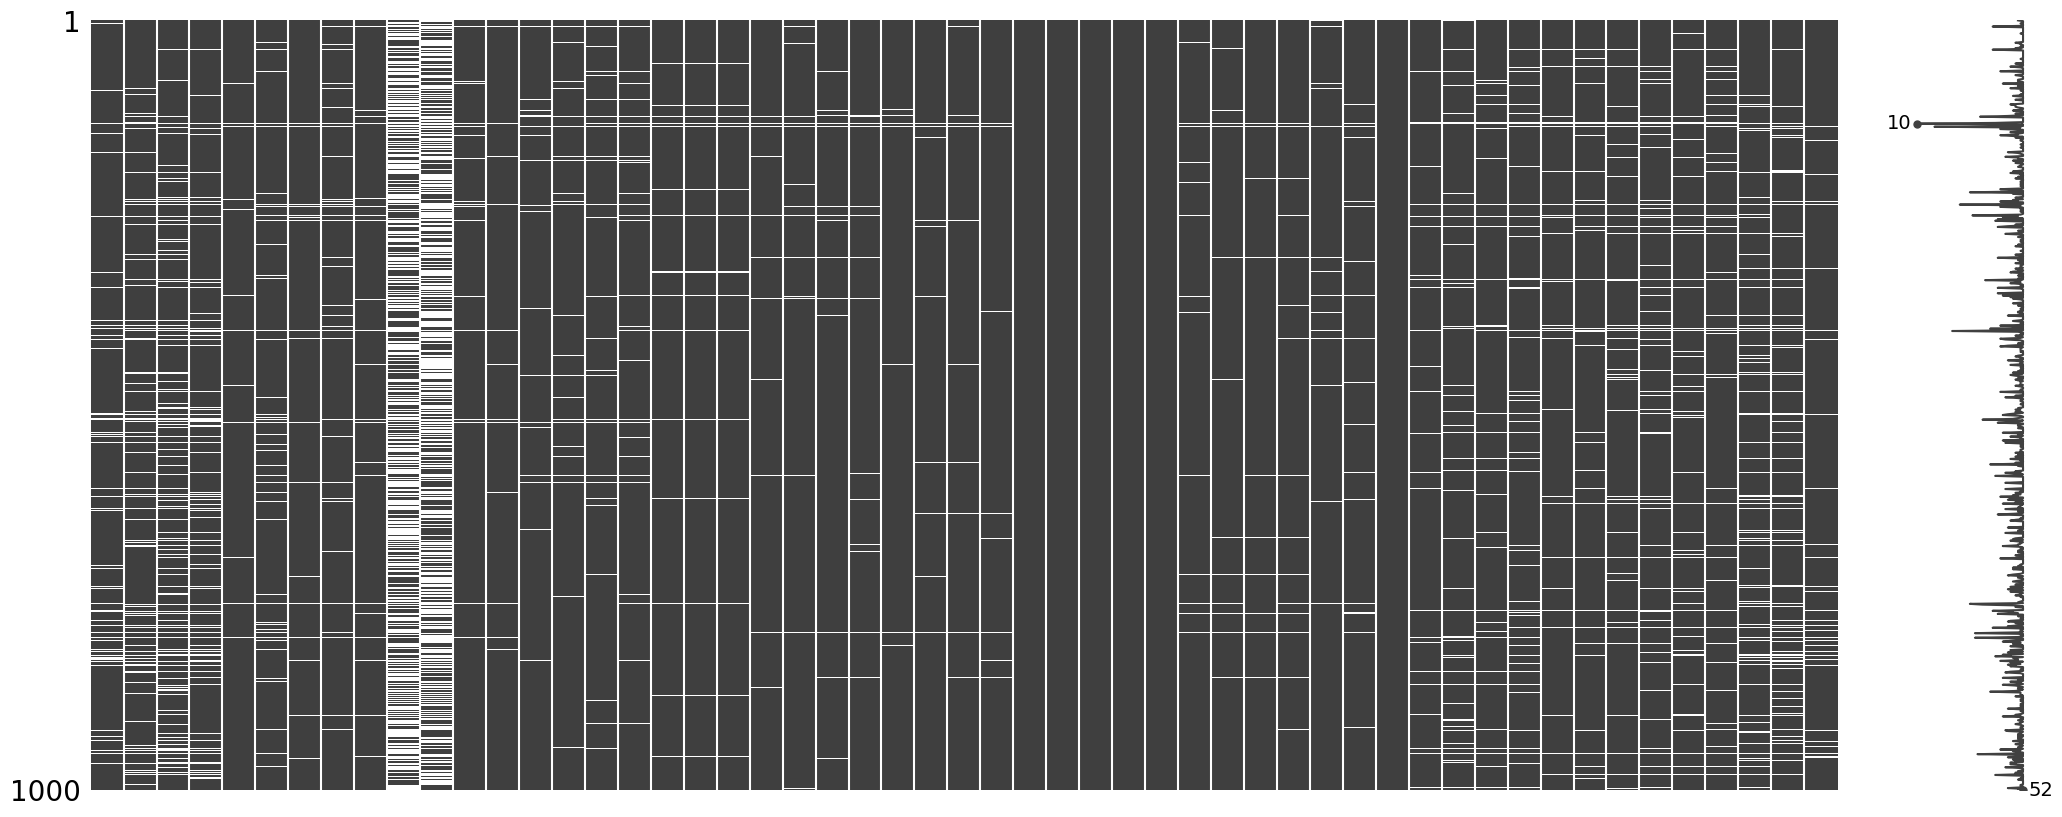

In [ ]:
#Check missing values for data

# Generate and display the missing values chart
msno.matrix(data)
plt.show()

In [ ]:
#Check missing values for data
print(data.isnull().sum().sort_values(ascending=False))

renewpatriotact                                  523
usafreedomact                                    508
economicideology                                 142
natsecurityideology                              115
socialideology                                   101
militarism.diplomacy                              90
militarism.strength                               87
egalitarianism.worryless                          64
ideology                                          64
moraltrad.lifestyle                               60
egalitarianism.notbigprob                         58
moraltrad.familyvalues                            58
approvekeystone                                   53
egalitarianism.fewerprobs                         51
egalitarianism.bigprob                            47
transpacificpartnershipact                        44
egalitarianism.toofar                             42
moraltrad.tolerant                                38
partyid                                       

In [ ]:
# 2 varaibles with more that 50% of missing values are going to be drop
##  renewpatriotact                                  523 52% missing
## usafreedomact                                    508 51% missing

# Drop the specified columns
data = data.drop(columns=['renewpatriotact', 'usafreedomact'])

In [ ]:
# Function to calculate categorical correlation

# Calculate the Cramér's V correlation for categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


In [ ]:
# Check with Tagget varaibles PartyId Correlation
if 'partyid' in data.columns and 'economicideology' in data.columns:
    correlation = cramers_v(data['partyid'], data['economicideology'])
    print(f"Cramér's V correlation between partyid and economicideology: {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

Cramér's V correlation between partyid and economicideology: 0.5299214025600775


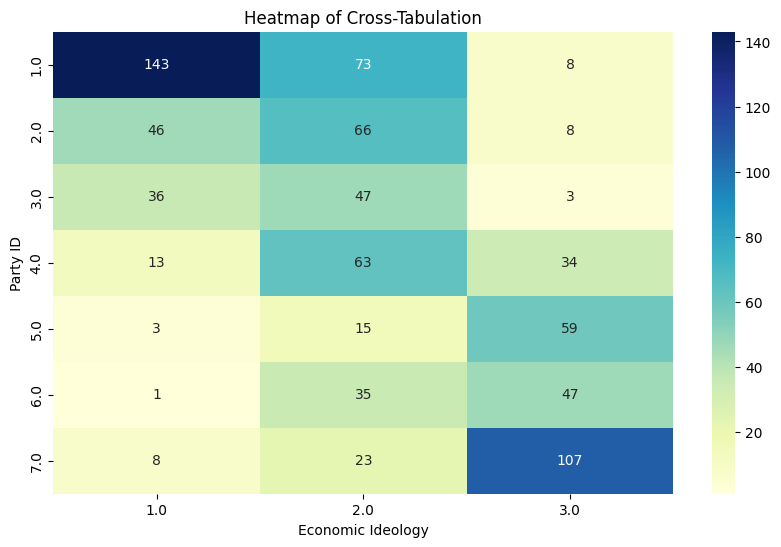

In [ ]:
# Generate a cross table bwtween 'partyid' in data.columns and 'economicideology

# Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data['economicideology'])

# Display the cross-tabulation
# cross_tab

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel("Economic Ideology")
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in 'economicideology' based on 'partyid'
def fill_economicideology(row):
    if pd.isnull(row['economicideology']):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 2
        elif row['partyid'] == 3:
            return 2
        elif row['partyid'] == 4:
            return 2
        elif row['partyid'] == 5:
            return 3
        elif row['partyid'] == 6:
            return 3
        elif row['partyid'] == 7:
            return 3
        else:
            return 2
    return row['economicideology']

data['economicideology'] = data.apply(fill_economicideology, axis=1)

In [ ]:
# Check missing values for 'natsecurityideology'
print(data['economicideology'].isnull().sum())

0


In [ ]:
# Check with Tagget varaibles PartyId Correlation
if 'partyid' in data.columns and 'natsecurityideology' in data.columns:
    correlation = cramers_v(data['partyid'], data['natsecurityideology'])
    print(f"Cramér's V correlation between partyid and natsecurityideology: {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

Cramér's V correlation between partyid and natsecurityideology: 0.4757022249040236


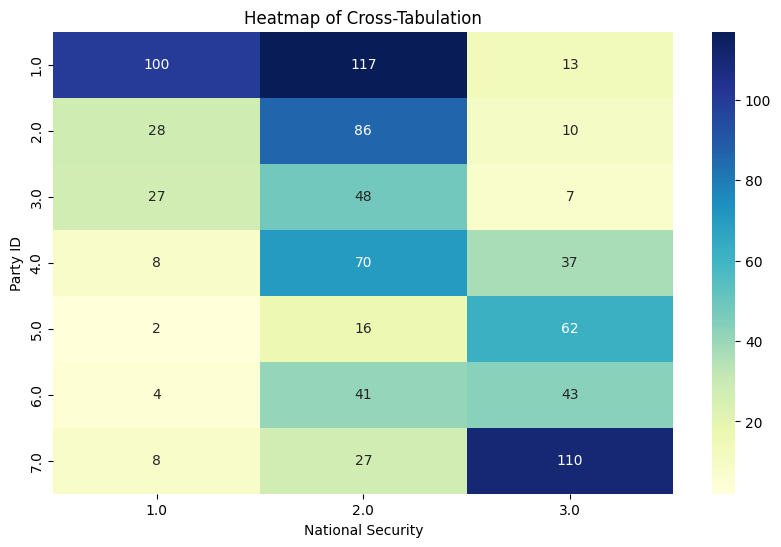

In [ ]:
# Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data['natsecurityideology'])

# Display the cross-tabulation
# cross_tab

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel("National Security")
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in 'economicideology' based on 'partyid'
def fill_natsecurityideology(row):
    if pd.isnull(row['natsecurityideology']):
        if row['partyid'] == 1:
            return 2
        elif row['partyid'] == 5:
            return 3
        elif row['partyid'] == 6:
            return 3
        elif row['partyid'] == 7:
            return 3
        else:
            return 2
    return row['natsecurityideology']

data['natsecurityideology'] = data.apply(fill_natsecurityideology, axis=1)
print(data['natsecurityideology'].isnull().sum())

0


socialideology
Cramér's V correlation between partyid and varaible : 0.41494969980899343


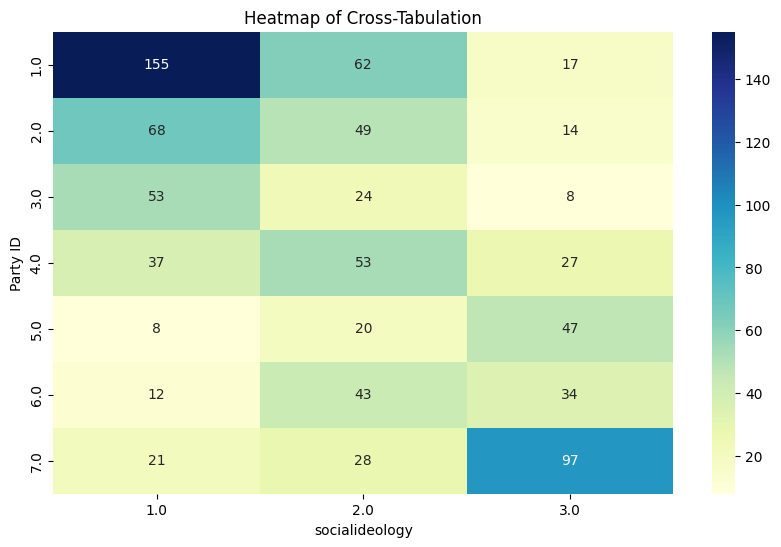

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'socialideology'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in 'economicideology' based on 'partyid'
def fill_socialideology(row):
    if pd.isnull(row['socialideology']):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 7:
            return 3
        else:
            return 2
    return row['socialideology']

data['socialideology'] = data.apply(fill_socialideology, axis=1)
print(data['socialideology'].isnull().sum())

0


militarism.diplomacy
Cramér's V correlation between partyid and varaible : 0.295065486320398


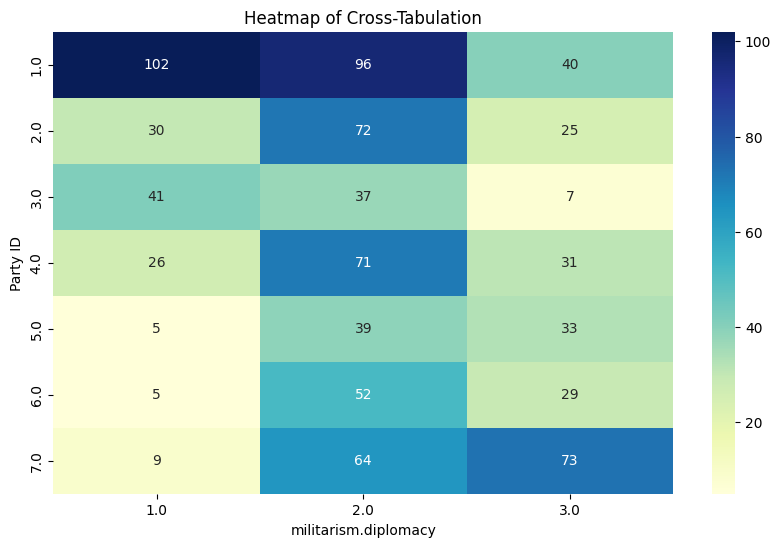

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'militarism.diplomacy'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in 'economicideology' based on 'partyid'
def fill_militarismdiplomacy(row):
    VaribletoCkecked = 'militarism.diplomacy'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 7:
            return 3
        else:
            return 2
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_militarismdiplomacy, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


militarism.strength
Cramér's V correlation between partyid and varaible : 0.3048980017626832


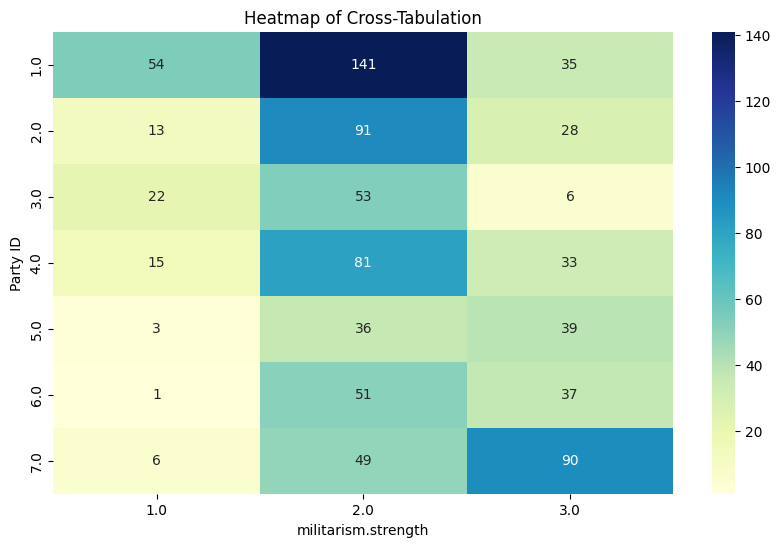

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'militarism.strength'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in 'economicideology' based on 'partyid'
def fill_militarismstrength(row):
    VaribletoCkecked = 'militarism.strength'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 5:
            return 3
        elif row['partyid'] == 6:
            return 3
        elif row['partyid'] == 7:
            return 3
        else:
            return 2
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_militarismstrength, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


ideology
Cramér's V correlation between partyid and varaible : 0.5529724146493435


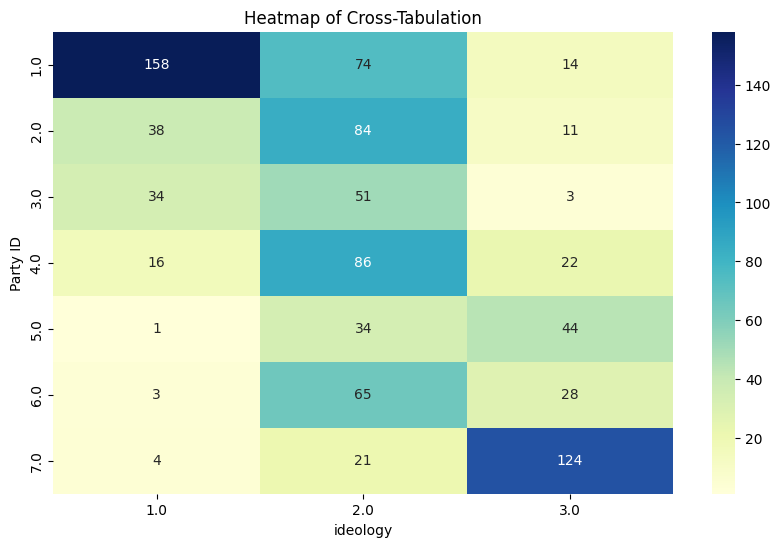

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'ideology'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_ideology(row):
    VaribletoCkecked = 'ideology'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 5:
            return 3
        elif row['partyid'] == 6:
            return 3
        elif row['partyid'] == 7:
            return 3
        else:
            return 2
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_ideology, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


egalitarianism.worryless
Cramér's V correlation between partyid and varaible : 0.27577389997712987


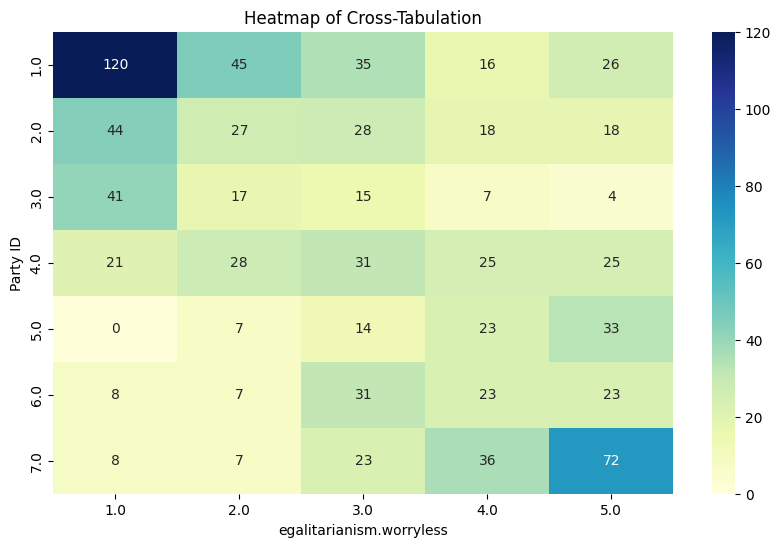

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'egalitarianism.worryless'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_egalitarianismworryless(row):
    VaribletoCkecked = 'egalitarianism.worryless'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 3
        elif row['partyid'] == 5:
            return 5
        elif row['partyid'] == 6:
            return 3
        elif row['partyid'] == 7:
            return 5
        else:
            return 3
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_egalitarianismworryless, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


moraltrad.lifestyle
Cramér's V correlation between partyid and varaible : 0.2248338960113253


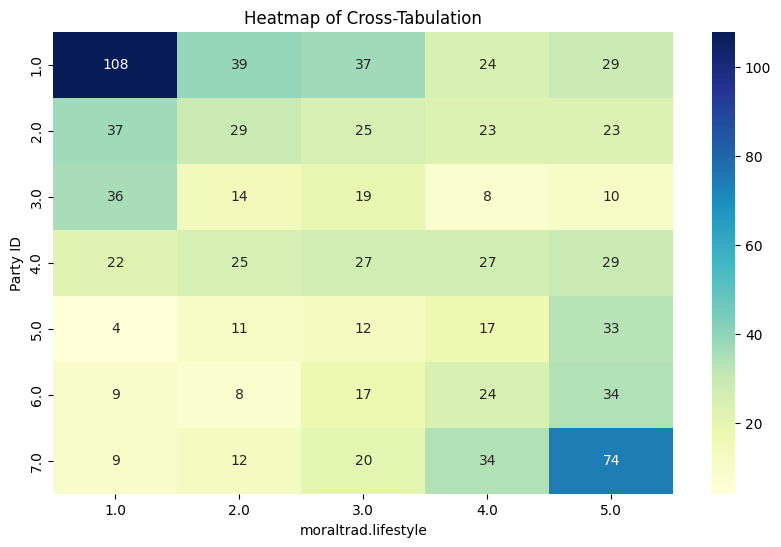

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'moraltrad.lifestyle'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_moraltradlifestyle(row):
    VaribletoCkecked = 'moraltrad.lifestyle'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 7:
            return 5
        else:
            return 3
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_moraltradlifestyle, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


egalitarianism.notbigprob
Cramér's V correlation between partyid and varaible : 0.20666801853252972


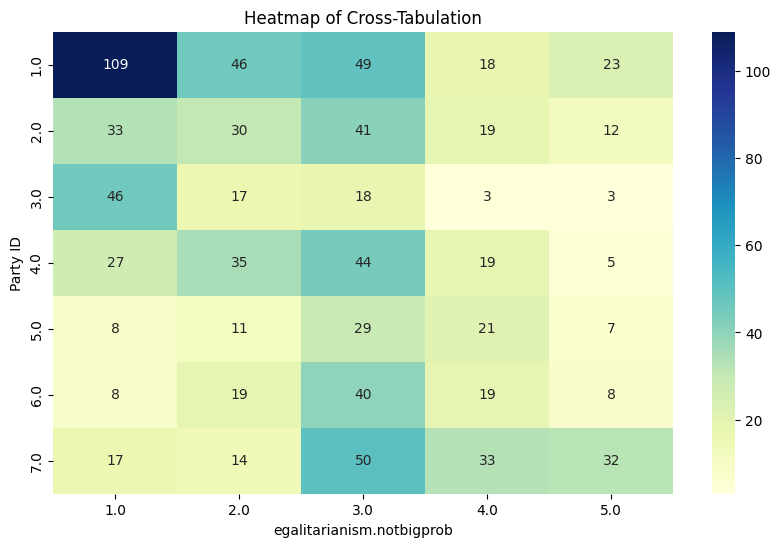

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'egalitarianism.notbigprob'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_egalitarianismnotbigprob(row):
    VaribletoCkecked = 'egalitarianism.notbigprob'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 3:
            return 1
        else:
            return 3
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_egalitarianismnotbigprob, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


moraltrad.familyvalues
Cramér's V correlation between partyid and varaible : 0.24430158417734052


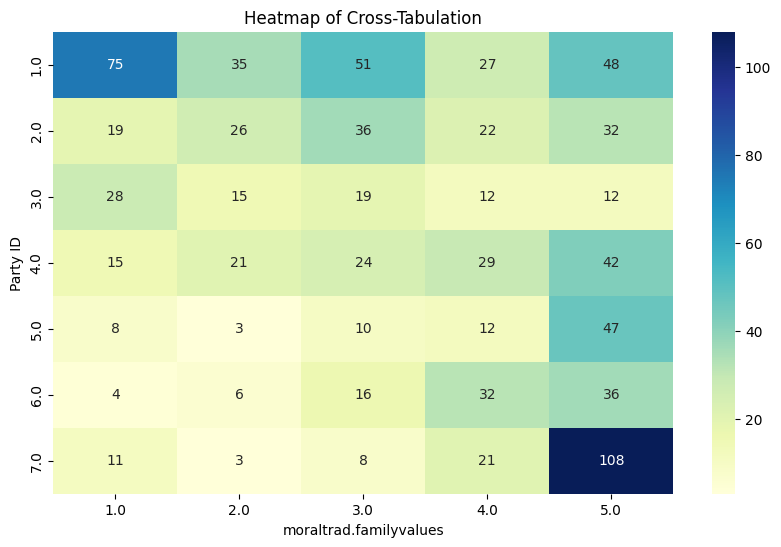

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'moraltrad.familyvalues'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_moraltradfamilyvalues(row):
    VaribletoCkecked = 'moraltrad.familyvalues'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 3
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 5
        elif row['partyid'] == 5:
            return 5
        elif row['partyid'] == 6:
            return 5
        elif row['partyid'] == 7:
            return 5
        else:
            return 3
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_moraltradfamilyvalues, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


approvekeystone
Cramér's V correlation between partyid and varaible : 0.5655995949181685


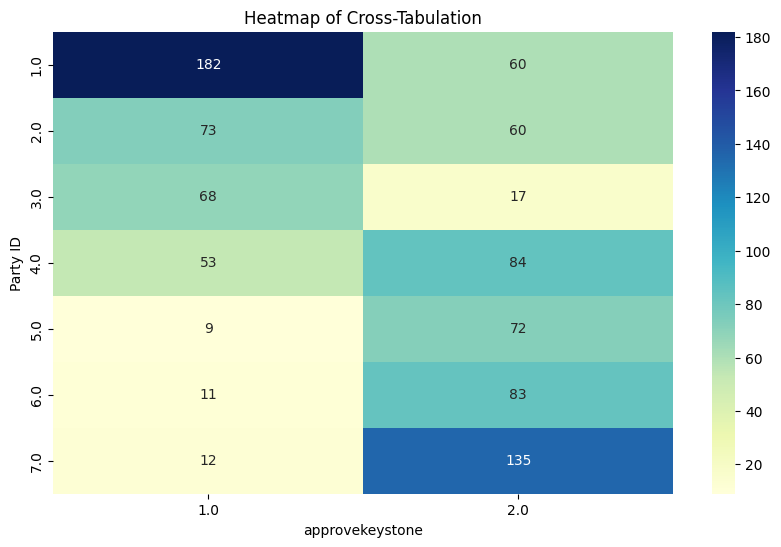

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'approvekeystone'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_approvekeystone(row):
    VaribletoCkecked = 'approvekeystone'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 2
        elif row['partyid'] == 5:
            return 2
        elif row['partyid'] == 6:
            return 2
        elif row['partyid'] == 7:
            return 2
        else:
            return 2
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_approvekeystone, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


egalitarianism.fewerprobs
Cramér's V correlation between partyid and varaible : 0.2514398345992454


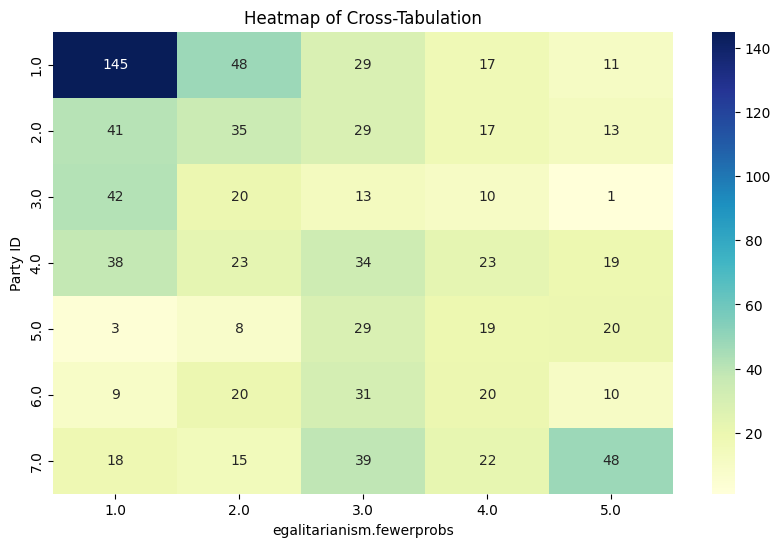

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'egalitarianism.fewerprobs'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_egalitarianismfewerprobs(row):
    VaribletoCkecked = 'egalitarianism.fewerprobs'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 2
        elif row['partyid'] == 5:
            return 3
        elif row['partyid'] == 6:
            return 3
        elif row['partyid'] == 7:
            return 5
        else:
            return 3
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_egalitarianismfewerprobs, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


egalitarianism.bigprob
Cramér's V correlation between partyid and varaible : 0.29066392382791345


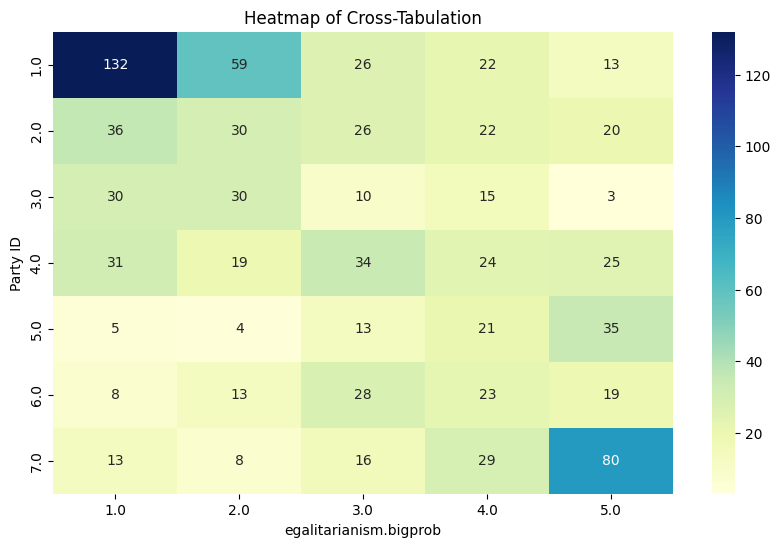

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'egalitarianism.bigprob'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_egalitarianismbigprob(row):
    VaribletoCkecked = 'egalitarianism.bigprob'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 2
        elif row['partyid'] == 4:
            return 3
        elif row['partyid'] == 5:
            return 5
        elif row['partyid'] == 6:
            return 3
        elif row['partyid'] == 7:
            return 5
        else:
            return 3
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_egalitarianismbigprob, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


transpacificpartnershipact
Cramér's V correlation between partyid and varaible : 0.1359183029202707


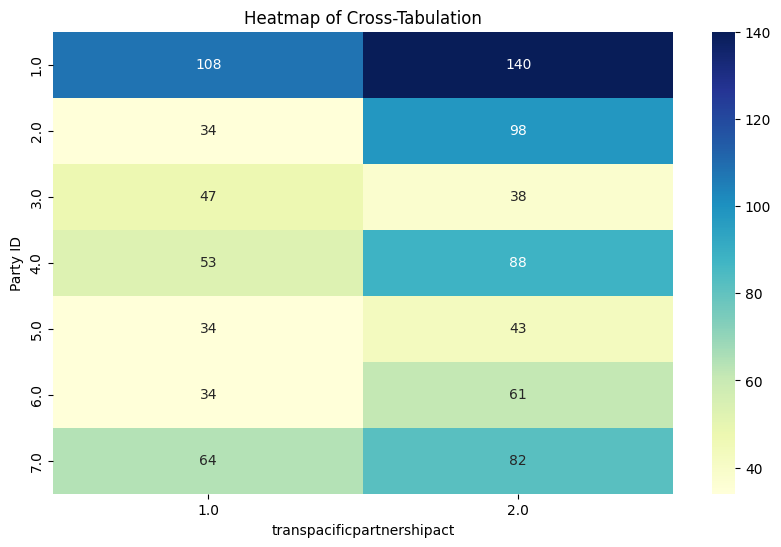

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'transpacificpartnershipact'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_transpacificpartnershipact(row):
    VaribletoCkecked = 'transpacificpartnershipact'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 3:
            return 1
        else:
            return 2
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_transpacificpartnershipact, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


egalitarianism.toofar
Cramér's V correlation between partyid and varaible : 0.2870152857664383


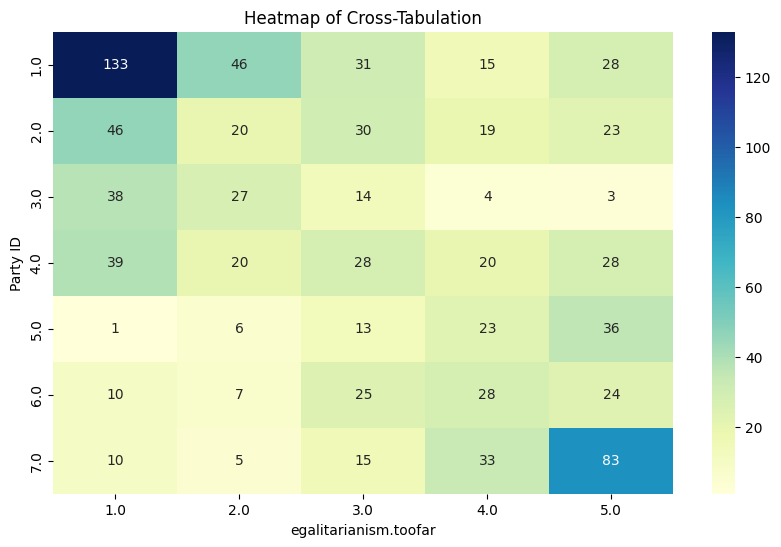

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'egalitarianism.toofar'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_egalitarianismtoofar(row):
    VaribletoCkecked = 'egalitarianism.toofar'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 1
        elif row['partyid'] == 5:
            return 5
        elif row['partyid'] == 6:
            return 4
        elif row['partyid'] == 7:
            return 5
        else:
            return 3
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_egalitarianismtoofar, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


moraltrad.tolerant
Cramér's V correlation between partyid and varaible : 0.16781681316233776


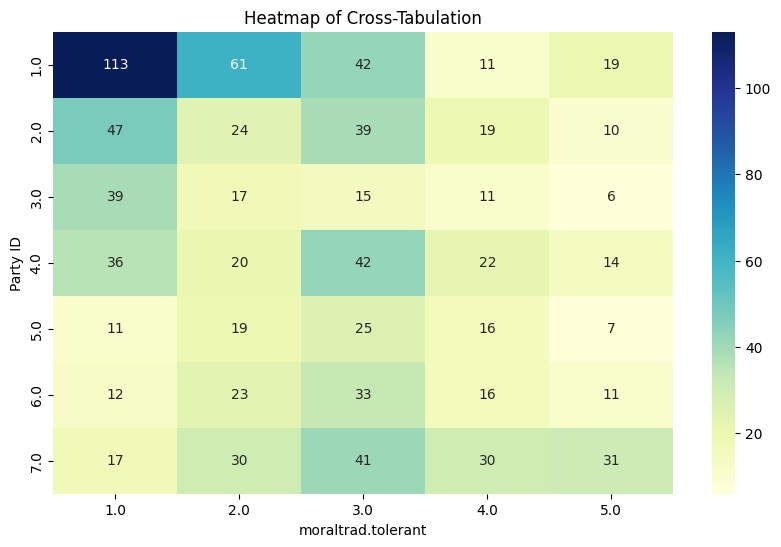

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'moraltrad.tolerant'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_moraltradtolerant(row):
    VaribletoCkecked = 'moraltrad.tolerant'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 3
        elif row['partyid'] == 5:
            return 3
        elif row['partyid'] == 6:
            return 3
        elif row['partyid'] == 7:
            return 3
        else:
            return 3
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_moraltradtolerant, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


taxhikepreventionact
Cramér's V correlation between partyid and varaible : 0.24081920070113913


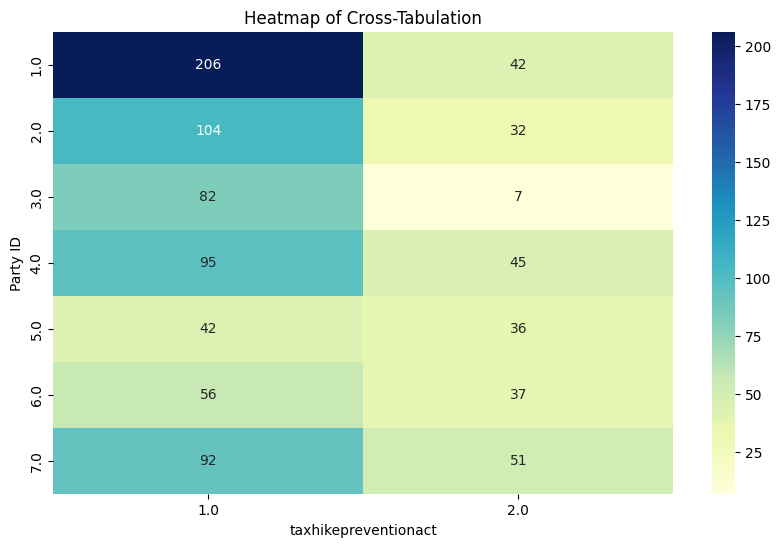

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'taxhikepreventionact'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_taxhikepreventionact(row):
    VaribletoCkecked = 'taxhikepreventionact'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        else:
            return 1
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_taxhikepreventionact, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


egalitarianism.equal
Cramér's V correlation between partyid and varaible : 0.21489253443161274


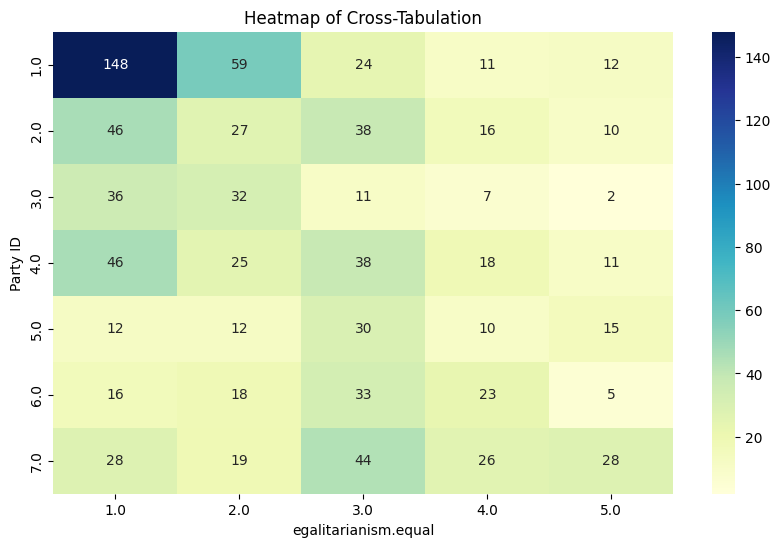

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'egalitarianism.equal'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_egalitarianismequal(row):
    VaribletoCkecked = 'egalitarianism.equal'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        else:
            return 1
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_egalitarianismequal, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


middleclasstaxcut
Cramér's V correlation between partyid and varaible : 0.19726111905221663


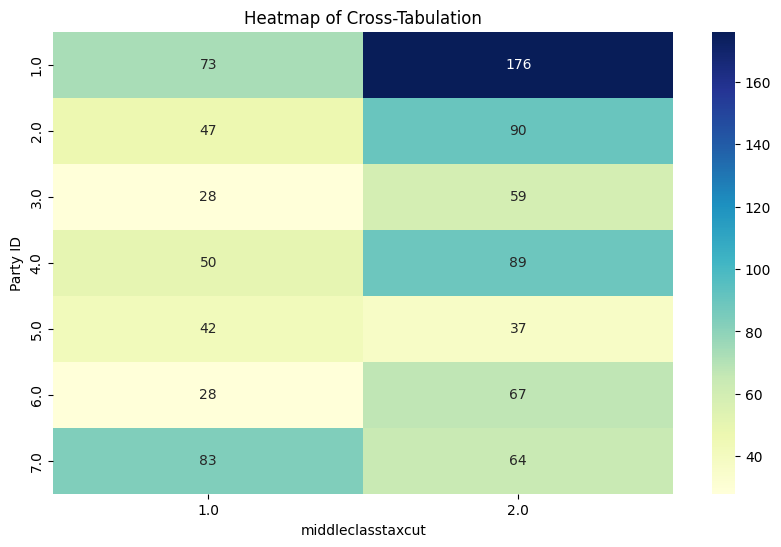

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'middleclasstaxcut'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_middleclasstaxcut(row):
    VaribletoCkecked = 'middleclasstaxcut'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 2
        elif row['partyid'] == 2:
            return 2
        elif row['partyid'] == 3:
            return 2
        elif row['partyid'] == 4:
            return 2
        elif row['partyid'] == 5:
            return 1
        elif row['partyid'] == 6:
            return 2
        elif row['partyid'] == 7:
            return 1
        else:
            return 2
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_middleclasstaxcut, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


moraltrad.adjust
Cramér's V correlation between partyid and varaible : 0.2198727796954064


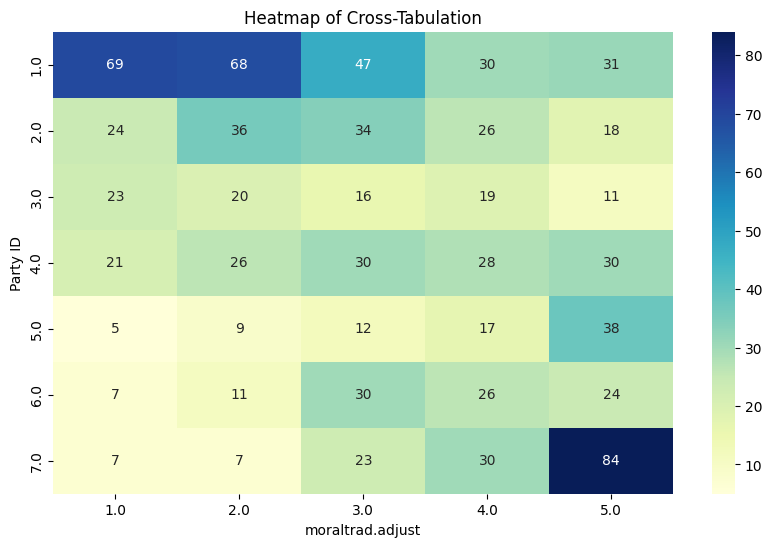

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'moraltrad.adjust'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_moraltradadjust(row):
    VaribletoCkecked = 'moraltrad.adjust'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 2
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 3
        elif row['partyid'] == 5:
            return 5
        elif row['partyid'] == 6:
            return 3
        elif row['partyid'] == 7:
            return 5
        else:
            return 3
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_moraltradadjust, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


budgetcutsacrossboard
Cramér's V correlation between partyid and varaible : 0.16013271629571613


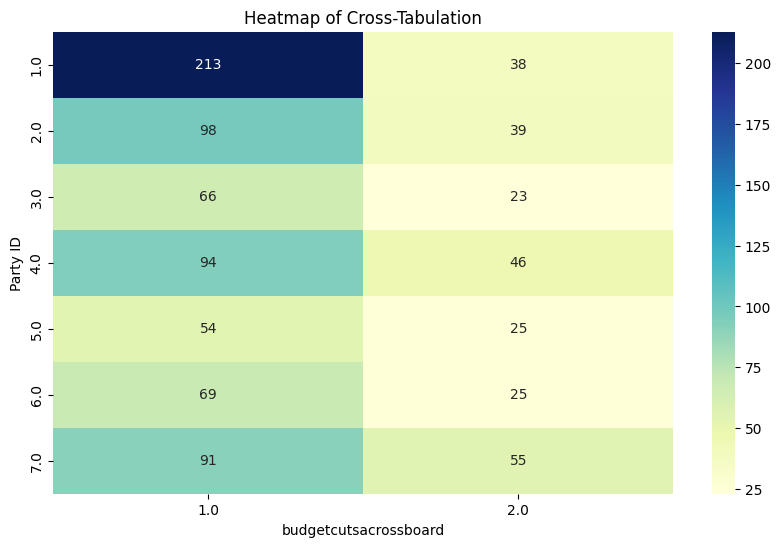

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'budgetcutsacrossboard'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_budgetcutsacrossboard(row):
    VaribletoCkecked = 'budgetcutsacrossboard'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 1
        elif row['partyid'] == 5:
            return 1
        elif row['partyid'] == 6:
            return 1
        elif row['partyid'] == 7:
            return 1
        else:
            return 1
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_budgetcutsacrossboard, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


normalizecubarelations
Cramér's V correlation between partyid and varaible : 0.37478447230682854


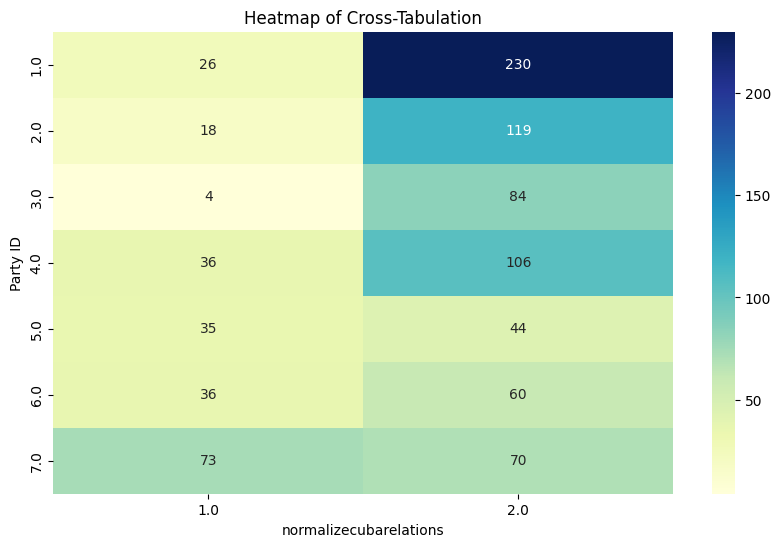

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'normalizecubarelations'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_normalizecubarelations(row):
    VaribletoCkecked = 'normalizecubarelations'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 1
        elif row['partyid'] == 5:
            return 1
        elif row['partyid'] == 6:
            return 1
        elif row['partyid'] == 7:
            return 1
        else:
            return 1
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_normalizecubarelations, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


cutmedicaremedicaid
Cramér's V correlation between partyid and varaible : 0.20747404916029924


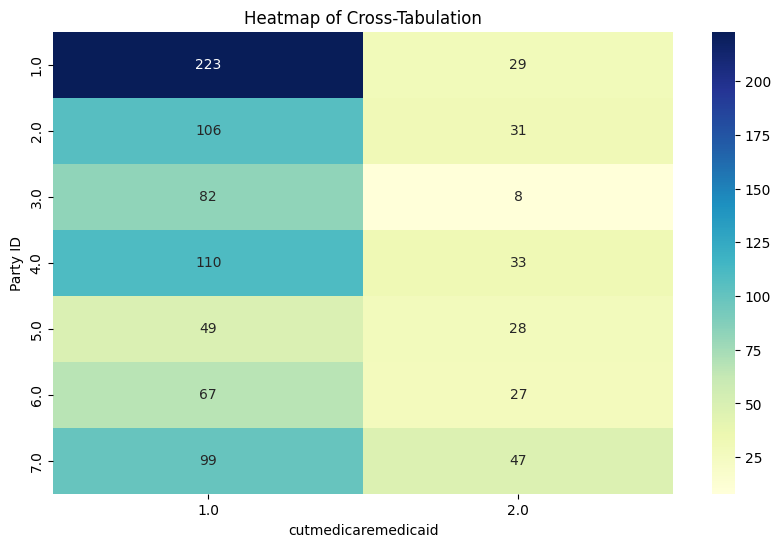

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'cutmedicaremedicaid'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_cutmedicaremedicaid(row):
    VaribletoCkecked = 'cutmedicaremedicaid'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 1
        elif row['partyid'] == 5:
            return 1
        elif row['partyid'] == 6:
            return 1
        elif row['partyid'] == 7:
            return 1
        else:
            return 1
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_cutmedicaremedicaid, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


tradeadjustmentact
Cramér's V correlation between partyid and varaible : 0.24597519802254553


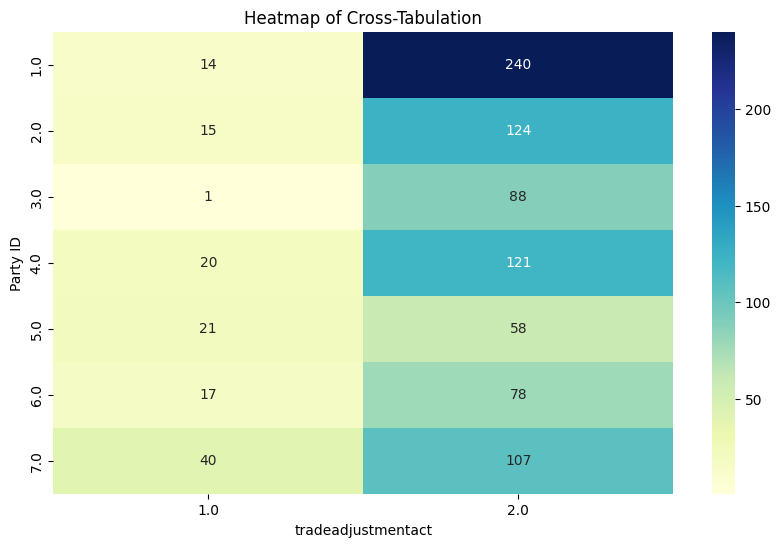

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'tradeadjustmentact'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_tradeadjustmentact(row):
    VaribletoCkecked = 'tradeadjustmentact'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 2
        elif row['partyid'] == 2:
            return 2
        elif row['partyid'] == 3:
            return 2
        elif row['partyid'] == 4:
            return 2
        elif row['partyid'] == 5:
            return 2
        elif row['partyid'] == 6:
            return 2
        elif row['partyid'] == 7:
            return 2
        else:
            return 2
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_tradeadjustmentact, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


iransanctions
Cramér's V correlation between partyid and varaible : 0.1487362588611789


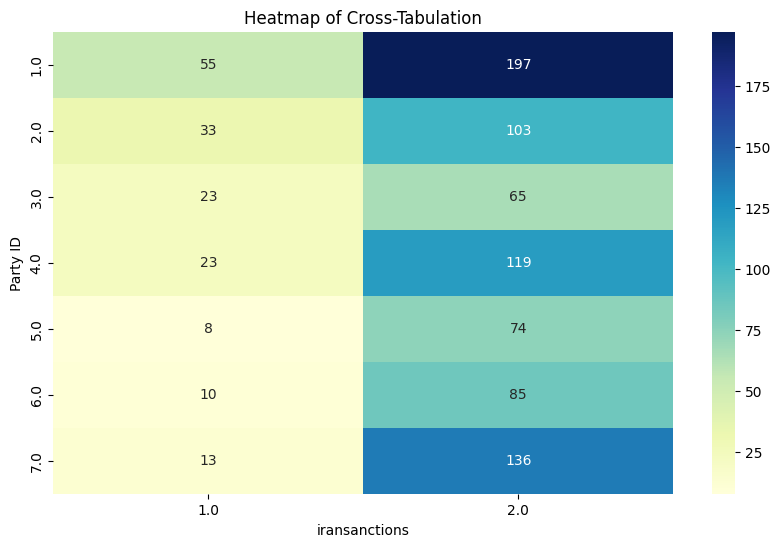

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'iransanctions'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_iransanctions(row):
    VaribletoCkecked = 'iransanctions'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 2
        elif row['partyid'] == 2:
            return 2
        elif row['partyid'] == 3:
            return 2
        elif row['partyid'] == 4:
            return 2
        elif row['partyid'] == 5:
            return 2
        elif row['partyid'] == 6:
            return 2
        elif row['partyid'] == 7:
            return 2
        else:
            return 2
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_iransanctions, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


balancebudget.firstchoice.cutdefensespending
Cramér's V correlation between partyid and varaible : 0.3950741603306644


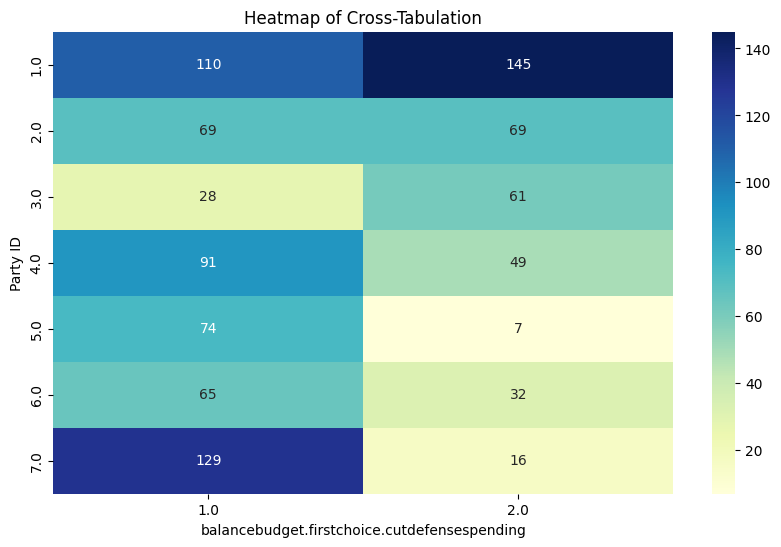

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'balancebudget.firstchoice.cutdefensespending'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_balancebudgetfirstchoicecutdefensespending(row):
    VaribletoCkecked = 'balancebudget.firstchoice.cutdefensespending'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 2
        elif row['partyid'] == 2:
            return 2
        elif row['partyid'] == 3:
            return 2
        elif row['partyid'] == 4:
            return 1
        elif row['partyid'] == 5:
            return 1
        elif row['partyid'] == 6:
            return 1
        elif row['partyid'] == 7:
            return 1
        else:
            return 1
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_balancebudgetfirstchoicecutdefensespending, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


balancebudget.firstchoice.raisetaxes
Cramér's V correlation between partyid and varaible : 0.03711972777166438


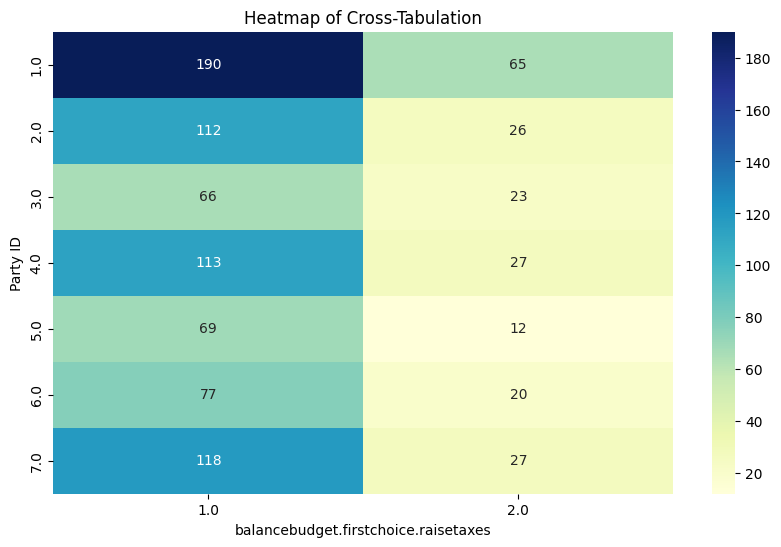

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'balancebudget.firstchoice.raisetaxes'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_balancebudgetfirstchoiceraisetaxes(row):
    VaribletoCkecked = 'balancebudget.firstchoice.raisetaxes'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 1
        elif row['partyid'] == 5:
            return 1
        elif row['partyid'] == 6:
            return 1
        elif row['partyid'] == 7:
            return 1
        else:
            return 1
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_balancebudgetfirstchoiceraisetaxes, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


balancebudget.firstchoice.cutdomesticspending
Cramér's V correlation between partyid and varaible : 0.46186124057324535


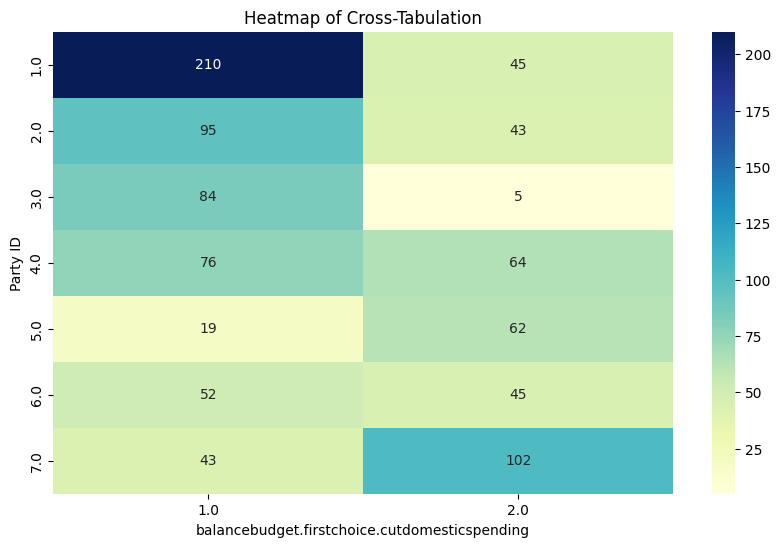

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'balancebudget.firstchoice.cutdomesticspending'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_balancebudgetfirstchoicecutdomesticspending(row):
    VaribletoCkecked = 'balancebudget.firstchoice.cutdomesticspending'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 1
        elif row['partyid'] == 5:
            return 2
        elif row['partyid'] == 6:
            return 1
        elif row['partyid'] == 7:
            return 2
        else:
            return 1
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_balancebudgetfirstchoicecutdomesticspending, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


affirmativeaction
Cramér's V correlation between partyid and varaible : 0.49636133659536646


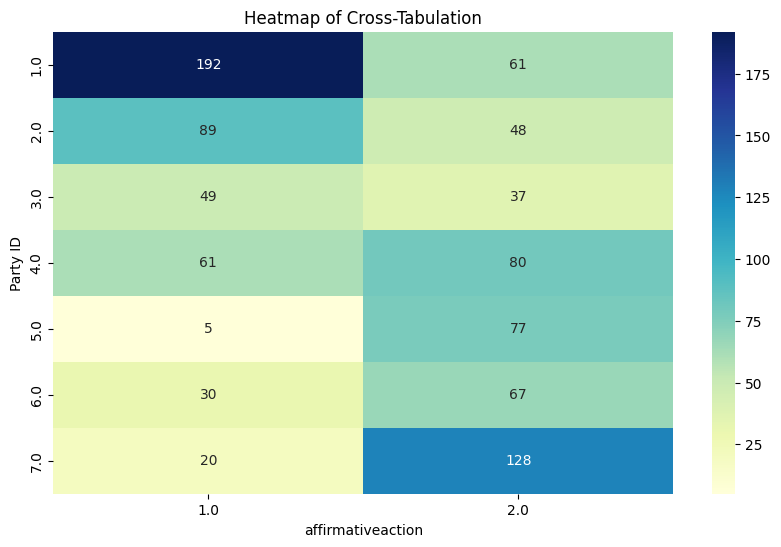

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'affirmativeaction'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_affirmativeaction(row):
    VaribletoCkecked = 'affirmativeaction'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 2
        elif row['partyid'] == 5:
            return 2
        elif row['partyid'] == 6:
            return 2
        elif row['partyid'] == 7:
            return 2
        else:
            return 2
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_affirmativeaction, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


prohibitfederalfundingabortions
Cramér's V correlation between partyid and varaible : 0.5032324486507461


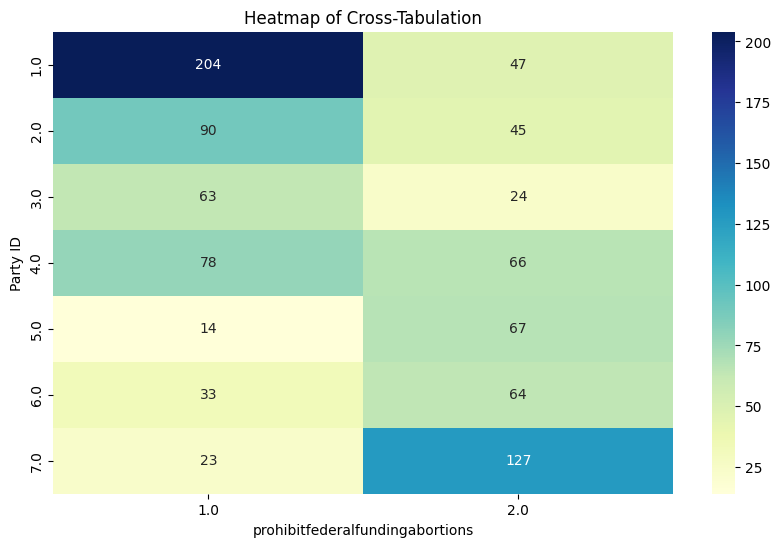

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'prohibitfederalfundingabortions'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_prohibitfederalfundingabortions(row):
    VaribletoCkecked = 'prohibitfederalfundingabortions'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 1
        elif row['partyid'] == 5:
            return 2
        elif row['partyid'] == 6:
            return 2
        elif row['partyid'] == 7:
            return 2
        else:
            return 1
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_prohibitfederalfundingabortions, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


environment_requirerenewablefuels
Cramér's V correlation between partyid and varaible : 0.44354150760712463


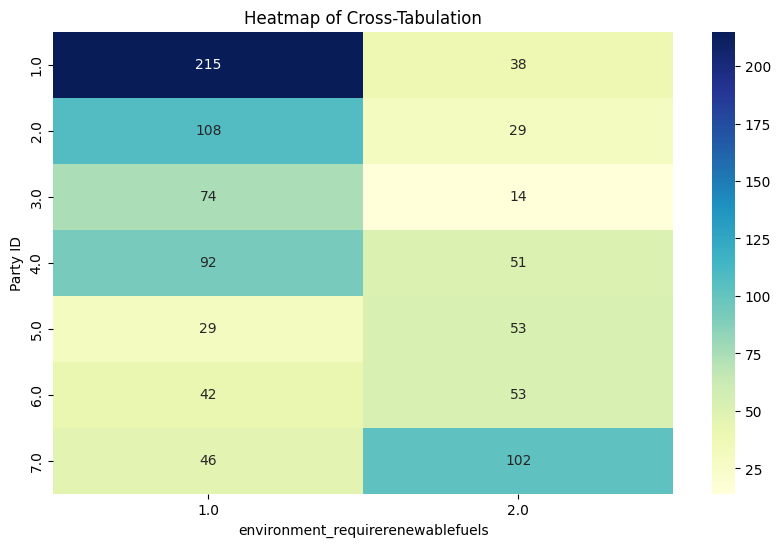

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'environment_requirerenewablefuels'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_environment_requirerenewablefuels(row):
    VaribletoCkecked = 'environment_requirerenewablefuels'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 1
        elif row['partyid'] == 5:
            return 2
        elif row['partyid'] == 6:
            return 2
        elif row['partyid'] == 7:
            return 2
        else:
            return 1
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_environment_requirerenewablefuels, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


environment_raisefuelefficiency
Cramér's V correlation between partyid and varaible : 0.38826213324386694


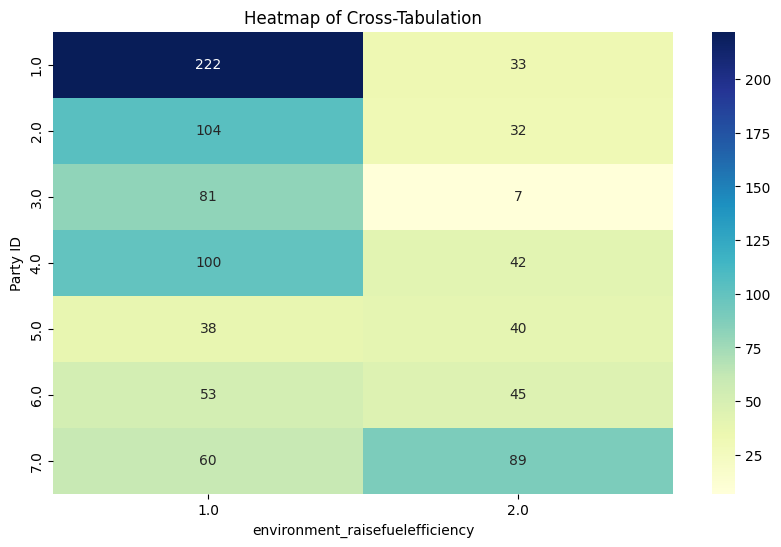

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'environment_raisefuelefficiency'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_environment_raisefuelefficiency(row):
    VaribletoCkecked = 'environment_raisefuelefficiency'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 1
        elif row['partyid'] == 5:
            return 2
        elif row['partyid'] == 6:
            return 1
        elif row['partyid'] == 7:
            return 2
        else:
            return 1
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_environment_raisefuelefficiency, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


guncontrol_prohibitpublishingnames
Cramér's V correlation between partyid and varaible : 0.2600775022291712


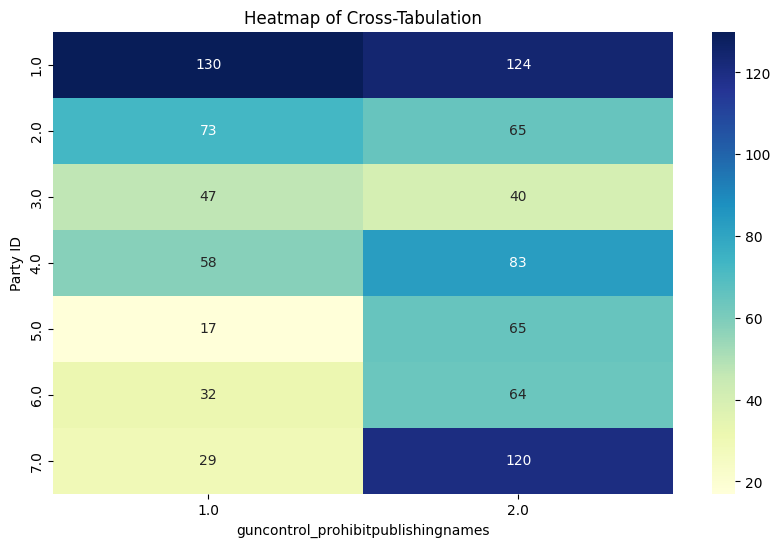

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'guncontrol_prohibitpublishingnames'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_guncontrol_prohibitpublishingnames(row):
    VaribletoCkecked = 'guncontrol_prohibitpublishingnames'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 2
        elif row['partyid'] == 5:
            return 2
        elif row['partyid'] == 6:
            return 2
        elif row['partyid'] == 7:
            return 2
        else:
            return 2
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_guncontrol_prohibitpublishingnames, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


environment_strengthenenforcementcleanair
Cramér's V correlation between partyid and varaible : 0.49308322241269353


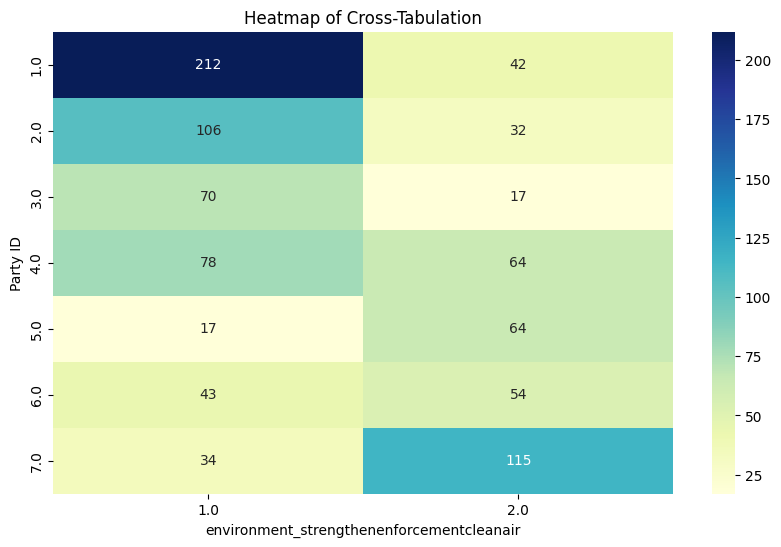

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'environment_strengthenenforcementcleanair'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_environment_strengthenenforcementcleanair(row):
    VaribletoCkecked = 'environment_strengthenenforcementcleanair'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 1
        elif row['partyid'] == 5:
            return 2
        elif row['partyid'] == 6:
            return 2
        elif row['partyid'] == 7:
            return 2
        else:
            return 1
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_environment_strengthenenforcementcleanair, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


gaymarriage
Cramér's V correlation between partyid and varaible : 0.47057600019749923


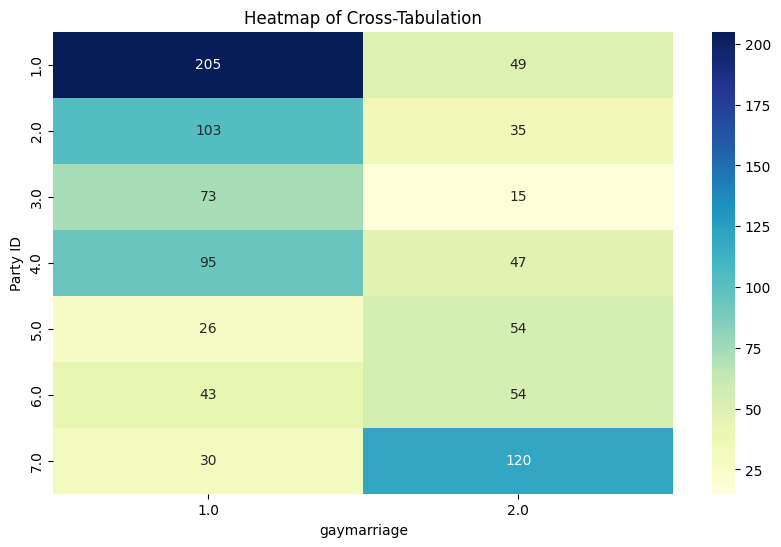

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'gaymarriage'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_gaymarriage(row):
    VaribletoCkecked = 'gaymarriage'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 1
        elif row['partyid'] == 5:
            return 2
        elif row['partyid'] == 6:
            return 2
        elif row['partyid'] == 7:
            return 2
        else:
            return 1
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_gaymarriage, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


alwaysallowabortion
Cramér's V correlation between partyid and varaible : 0.45520421420273643


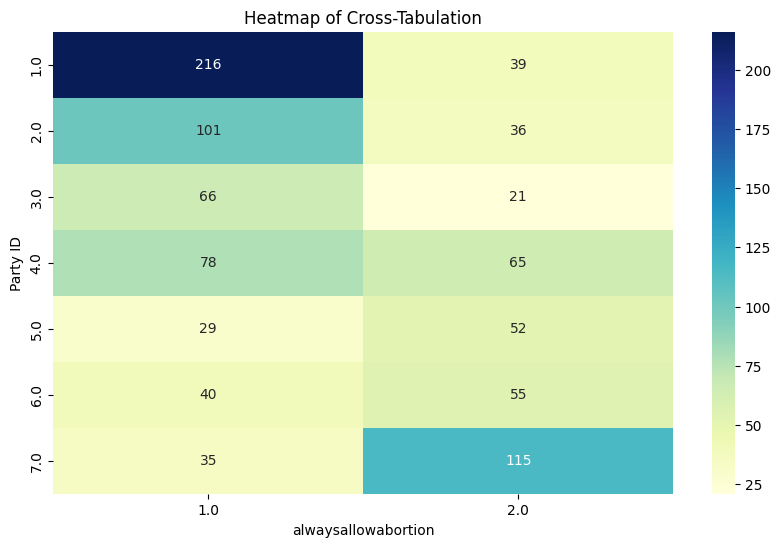

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'alwaysallowabortion'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_alwaysallowabortion(row):
    VaribletoCkecked = 'alwaysallowabortion'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 1
        elif row['partyid'] == 5:
            return 2
        elif row['partyid'] == 6:
            return 2
        elif row['partyid'] == 7:
            return 2
        else:
            return 1
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_alwaysallowabortion, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


prohibitabortiontwentyweeks
Cramér's V correlation between partyid and varaible : 0.33065988660231843


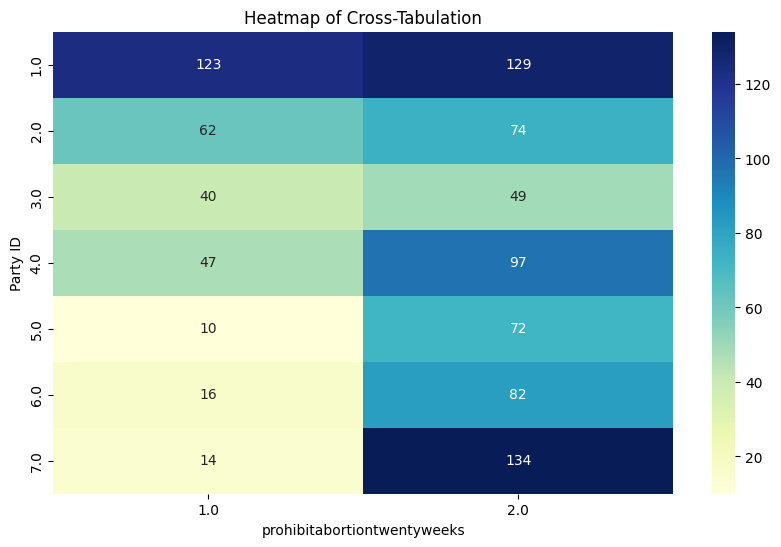

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'prohibitabortiontwentyweeks'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_prohibitabortiontwentyweeks(row):
    VaribletoCkecked = 'prohibitabortiontwentyweeks'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 2
        elif row['partyid'] == 2:
            return 2
        elif row['partyid'] == 3:
            return 2
        elif row['partyid'] == 4:
            return 2
        elif row['partyid'] == 5:
            return 2
        elif row['partyid'] == 6:
            return 2
        elif row['partyid'] == 7:
            return 2
        else:
            return 2
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_prohibitabortiontwentyweeks, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


repealACA
Cramér's V correlation between partyid and varaible : 0.5250061769494324


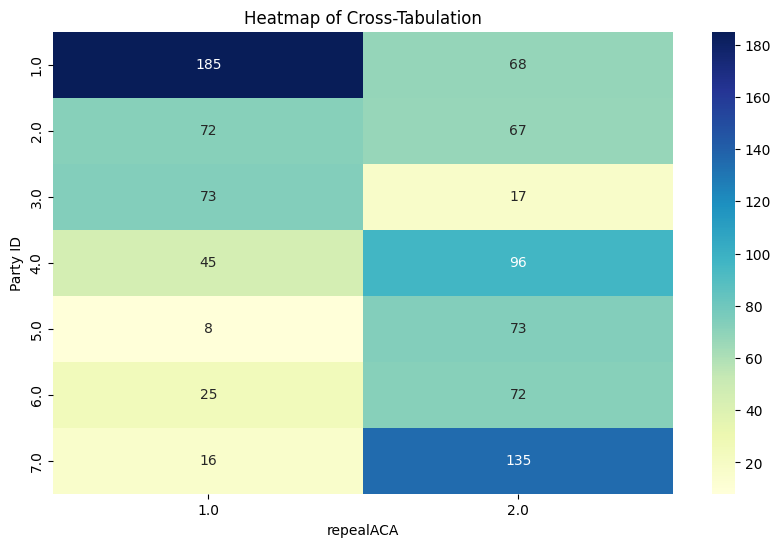

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'repealACA'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_repealACA(row):
    VaribletoCkecked = 'repealACA'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 2
        elif row['partyid'] == 5:
            return 2
        elif row['partyid'] == 6:
            return 2
        elif row['partyid'] == 7:
            return 2
        else:
            return 2
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_repealACA, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


environment_regulateCO2
Cramér's V correlation between partyid and varaible : 0.551568706030034


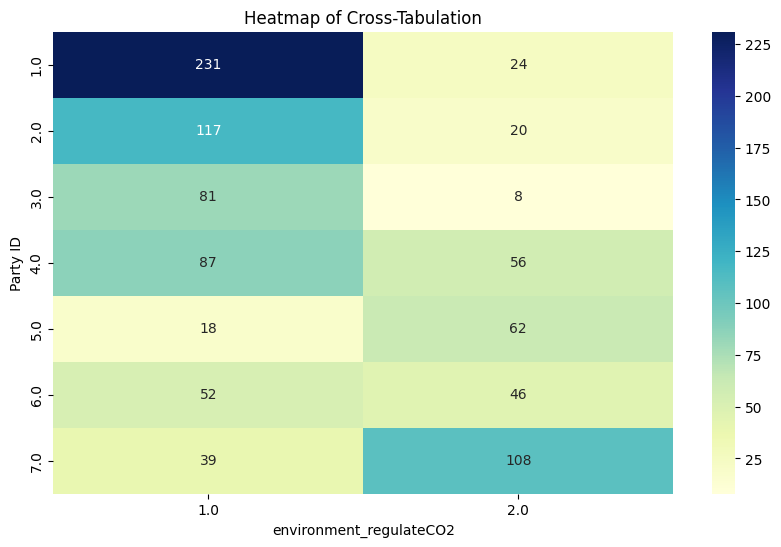

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'environment_regulateCO2'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_environment_regulateCO2(row):
    VaribletoCkecked = 'environment_regulateCO2'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 1
        elif row['partyid'] == 5:
            return 2
        elif row['partyid'] == 6:
            return 1
        elif row['partyid'] == 7:
            return 2
        else:
            return 1
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_environment_regulateCO2, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


VAWA
Cramér's V correlation between partyid and varaible : 0.12876485185212974


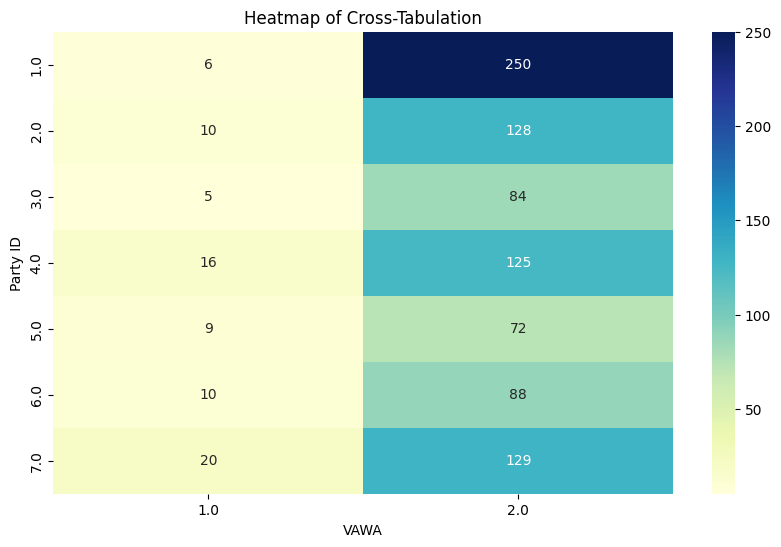

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'VAWA'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_VAWA(row):
    VaribletoCkecked = 'VAWA'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 2
        elif row['partyid'] == 2:
            return 2
        elif row['partyid'] == 3:
            return 2
        elif row['partyid'] == 4:
            return 2
        elif row['partyid'] == 5:
            return 2
        elif row['partyid'] == 6:
            return 2
        elif row['partyid'] == 7:
            return 2
        else:
            return 1
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_VAWA, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


guncontrol_banassaultrifles
Cramér's V correlation between partyid and varaible : 0.4697532273670695


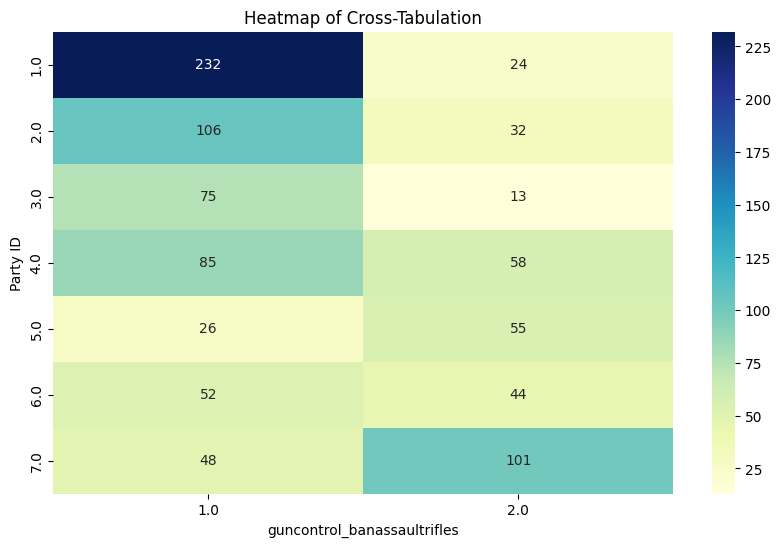

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'guncontrol_banassaultrifles'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_guncontrol_banassaultrifles(row):
    VaribletoCkecked = 'guncontrol_banassaultrifles'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 1
        elif row['partyid'] == 5:
            return 2
        elif row['partyid'] == 6:
            return 1
        elif row['partyid'] == 7:
            return 2
        else:
            return 1
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_guncontrol_banassaultrifles, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


allowemployersdeclineabortion
Cramér's V correlation between partyid and varaible : 0.5012125198915908


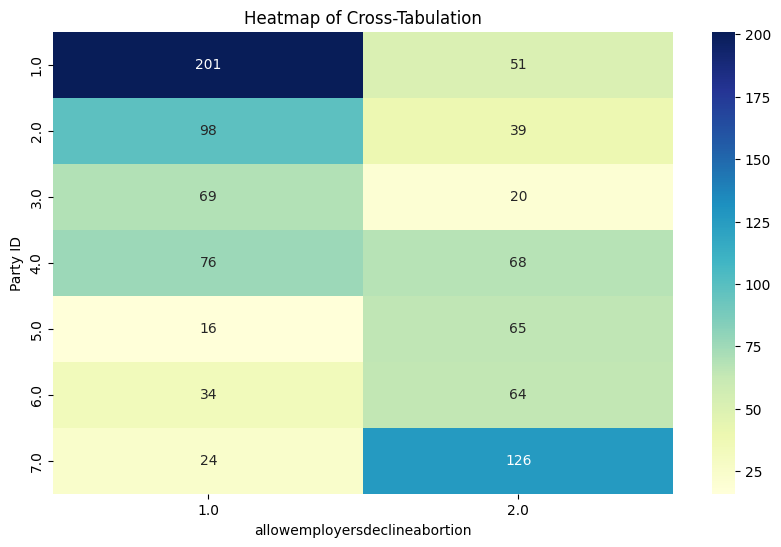

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'allowemployersdeclineabortion'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_allowemployersdeclineabortion(row):
    VaribletoCkecked = 'allowemployersdeclineabortion'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 1
        elif row['partyid'] == 5:
            return 2
        elif row['partyid'] == 6:
            return 2
        elif row['partyid'] == 7:
            return 2
        else:
            return 1
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_allowemployersdeclineabortion, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


guncontrol_easierconcealcarry
Cramér's V correlation between partyid and varaible : 0.42500867246249396


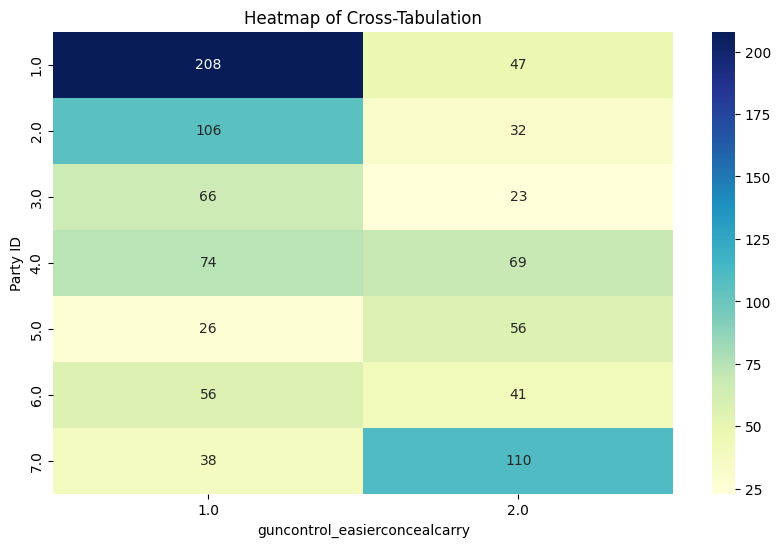

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'guncontrol_easierconcealcarry'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_guncontrol_easierconcealcarry(row):
    VaribletoCkecked = 'guncontrol_easierconcealcarry'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 1
        elif row['partyid'] == 5:
            return 2
        elif row['partyid'] == 6:
            return 1
        elif row['partyid'] == 7:
            return 2
        else:
            return 1
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_guncontrol_easierconcealcarry, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


guncontrol_backchecks
Cramér's V correlation between partyid and varaible : 0.2923009504872893


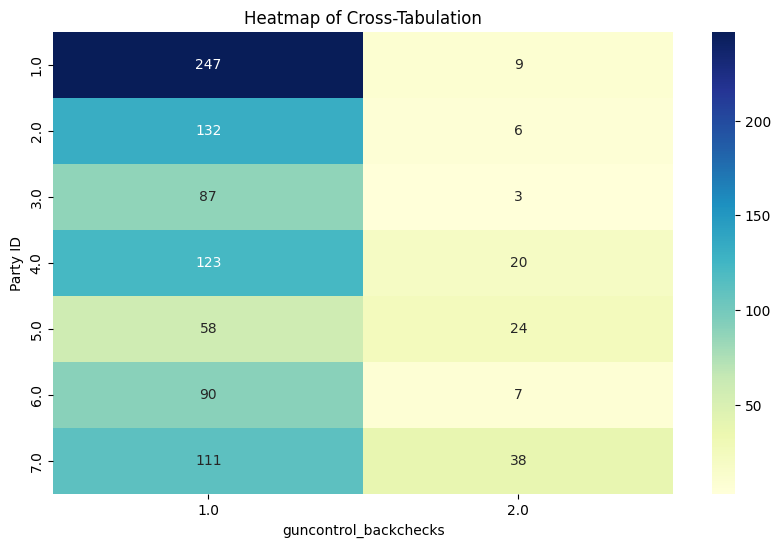

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'guncontrol_backchecks'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Fill missing values in based on 'partyid'
def fill_guncontrol_backchecks(row):
    VaribletoCkecked = 'guncontrol_backchecks'
    if pd.isnull(row[VaribletoCkecked]):
        if row['partyid'] == 1:
            return 1
        elif row['partyid'] == 2:
            return 1
        elif row['partyid'] == 3:
            return 1
        elif row['partyid'] == 4:
            return 1
        elif row['partyid'] == 5:
            return 1
        elif row['partyid'] == 6:
            return 1
        elif row['partyid'] == 7:
            return 1
        else:
            return 1
    return row[VaribletoCkecked]

data[VaribletoCkecked] = data.apply(fill_guncontrol_backchecks, axis=1)
print(data[VaribletoCkecked].isnull().sum())

0


In [ ]:
#Check missing values for data
print(data.isnull().sum().sort_values(ascending=False))

partyid                                          38
moraltrad.adjust                                  0
immigration_allowpolicequestion                   0
immigration_finebusinesseshire                    0
immigration_deportillegalimmigrants               0
alwaysallowabortion                               0
prohibitabortiontwentyweeks                       0
allowemployersdeclineabortion                     0
prohibitfederalfundingabortions                   0
gaymarriage                                       0
affirmativeaction                                 0
syria_significantforce                            0
moraltrad.lifestyle                               0
immigration_grantlegalstatus                      0
moraltrad.tolerant                                0
moraltrad.familyvalues                            0
egalitarianism.equal                              0
egalitarianism.toofar                             0
egalitarianism.bigprob                            0
egalitariani

In [ ]:
# Export to CSV
data.to_csv('issuesvaluesshortIMPUTED.csv', index=False)

# cMCA

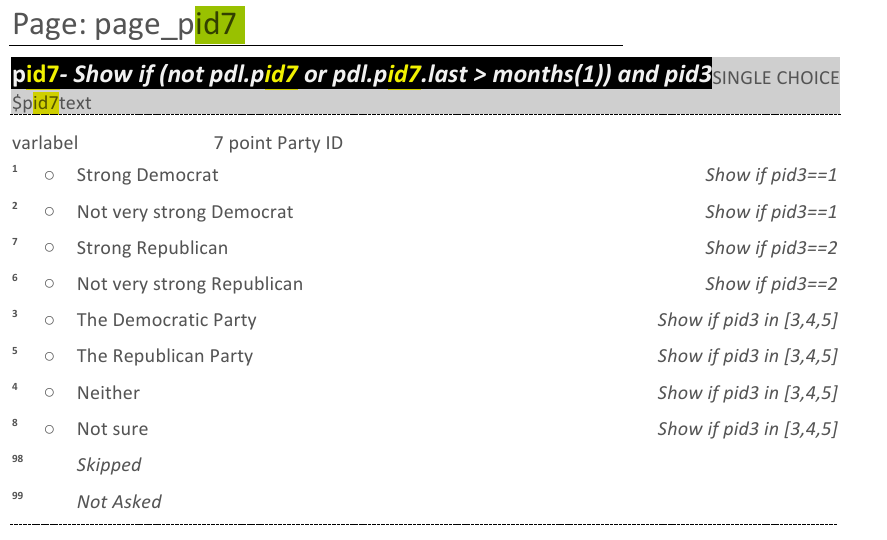

## (a)Target:Dem,Background:Rep (OriginalcMCAResults)

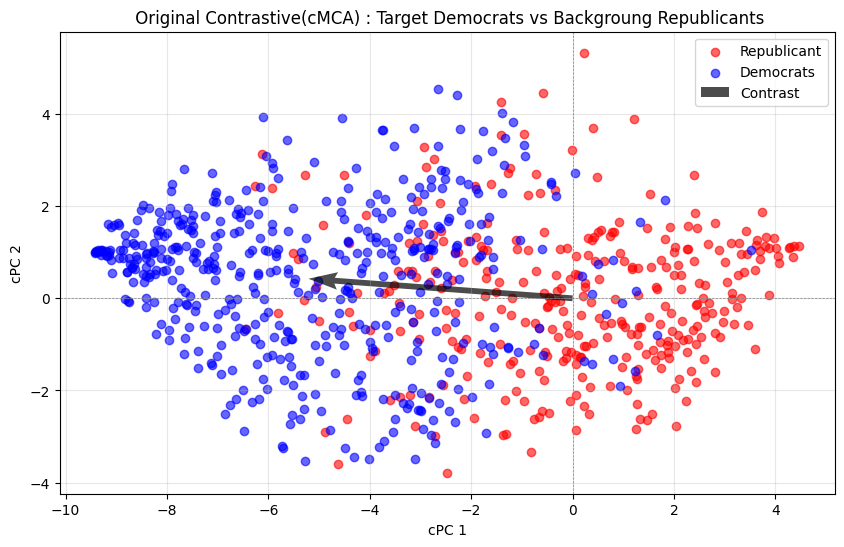

In [ ]:
# (a)Target:Dem,Background:Rep (OriginalcMCAResults)
# Background
group1 = data[data['partyid'] > 4].drop(columns=['partyid']) # Republicans

# Target
group2 = data[data['partyid'] < 4].drop(columns=['partyid']) # Democrats

# Apply PCA (proxy for MCA) directly to both groups without one-hot encoding
pca = PCA(n_components=2)

# Fit PCA on group 1 and transform both groups
group1_pca = pca.fit_transform(group1)
group2_pca = pca.transform(group2)

# Compute the contrast (difference in coordinates)
contrast = group2_pca - np.mean(group1_pca, axis=0)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(group1_pca[:, 0], group1_pca[:, 1], alpha=0.6, label="Republicant", color="red")
plt.scatter(group2_pca[:, 0], group2_pca[:, 1], alpha=0.6, label="Democrats", color="blue")
plt.quiver(
    np.mean(group1_pca[:, 0]),  # X-coordinate of the arrow starting point
    np.mean(group1_pca[:, 1]),  # Y-coordinate of the arrow starting point
    np.mean(contrast[:, 0]),  # X-component of the arrow vector (mean contrast for dimension 1)
    np.mean(contrast[:, 1]),  # Y-component of the arrow vector (mean contrast for dimension 2)
    angles='xy', scale_units='xy', scale=1, color='black', alpha=0.7, label='Contrast'
)

plt.title(" Original Contrastive(cMCA) : Target Democrats vs Backgroung Republicants")
plt.xlabel("cPC 1")
plt.ylabel("cPC 2")
plt.axhline(0, color='grey', linewidth=0.5, linestyle='--')
plt.axvline(0, color='grey', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Create Tag of Dem_Lib and Dem_Oth

militarism.strength
Cramér's V correlation between partyid and varaible : 0.32186571605226866


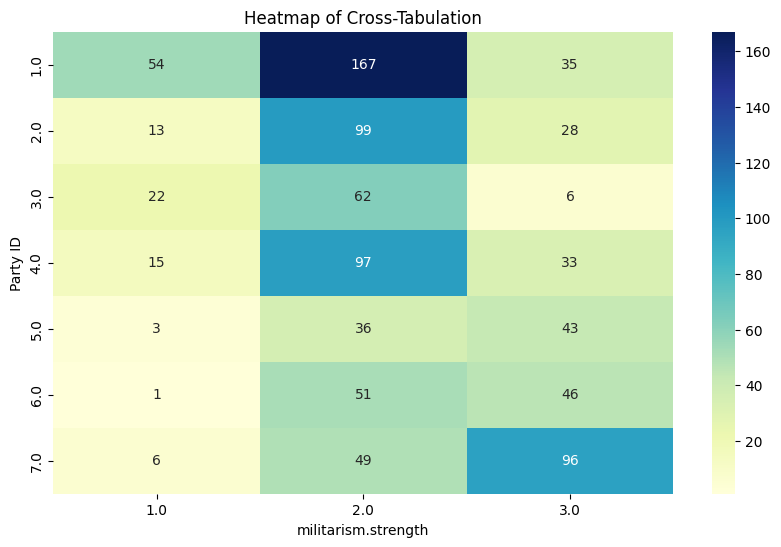

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'militarism.strength'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

militarism.diplomacy
Cramér's V correlation between partyid and varaible : 0.32374987438370645


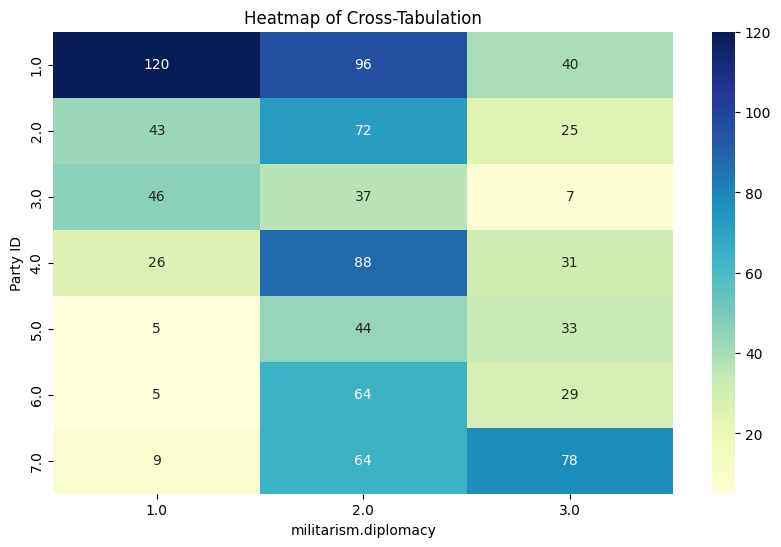

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'militarism.diplomacy'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

egalitarianism.fewerprobs
Cramér's V correlation between partyid and varaible : 0.26845037906116637


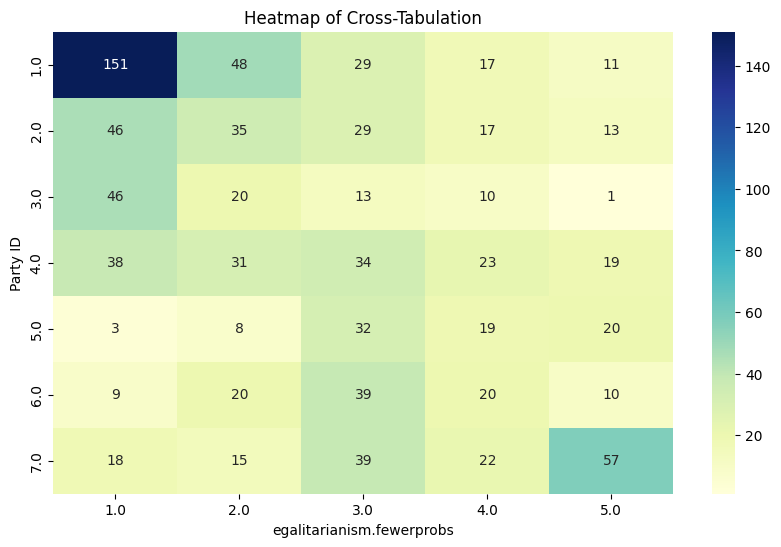

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'egalitarianism.fewerprobs'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Create DemClass DataFrame by copying group2
DemClass = group2.copy()
# Now you can proceed with the rest of your code
DemClass['DemTag'] = ''

# Iterate through the DataFrame and update the 'DemTag' column based on your conditions
for index, row in group2.iterrows():
    if row['militarism.strength'] >= 2 and row['militarism.diplomacy'] >= 2 and row['egalitarianism.fewerprobs'] > 3:
        DemClass.loc[index, 'DemTag'] = 'Dem_Lib'
    else:
        DemClass.loc[index, 'DemTag'] = 'Dem_Oth'
    # Add other conditions for different DemTag values if needed

In [ ]:
# Chek results of classificaiton
DemClass['DemTag'].value_counts()

,count
DemTag,
Dem_Oth,432
Dem_Lib,54


## (b)Target:Dem,Background:Rep (withBackground)

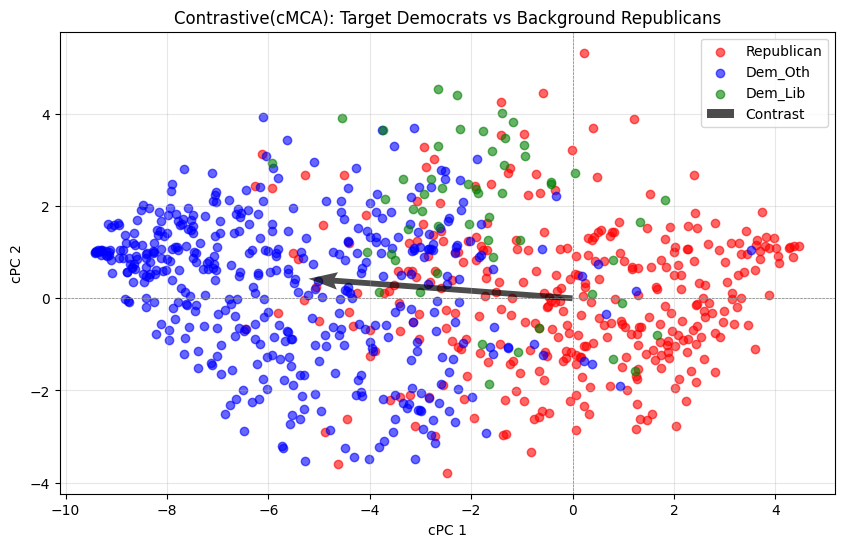

In [ ]:
# (b)Target:Dem,Background:Rep (withBackground Rep)
# Visualization with color coding by DemTag
plt.figure(figsize=(10, 6))

# Scatter plot for Republicans
plt.scatter(group1_pca[:, 0], group1_pca[:, 1], alpha=0.6, label="Republican", color="red")

# Scatter plot for Democrats, colored by DemTag
for tag in DemClass['DemTag'].unique():
    subset = DemClass[DemClass['DemTag'] == tag]
    subset_pca = pca.transform(subset.drop(columns=['DemTag'])) # Apply the same PCA transformation
    color = "green" if tag == "Dem_Lib" else "blue"  # Assign green and blue colors based on DemTag
    plt.scatter(subset_pca[:, 0], subset_pca[:, 1], alpha=0.6, label=tag, color=color)

plt.quiver(
    np.mean(group1_pca[:, 0]),
    np.mean(group1_pca[:, 1]),
    np.mean(contrast[:, 0]),
    np.mean(contrast[:, 1]),
    angles='xy', scale_units='xy', scale=1, color='black', alpha=0.7, label='Contrast'
)

plt.title("Contrastive(cMCA): Target Democrats vs Background Republicans")
plt.xlabel("cPC 1")
plt.ylabel("cPC 2")
plt.axhline(0, color='grey', linewidth=0.5, linestyle='--')
plt.axvline(0, color='grey', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## (c)Target:Dem,Background:Rep (withoutBackground)

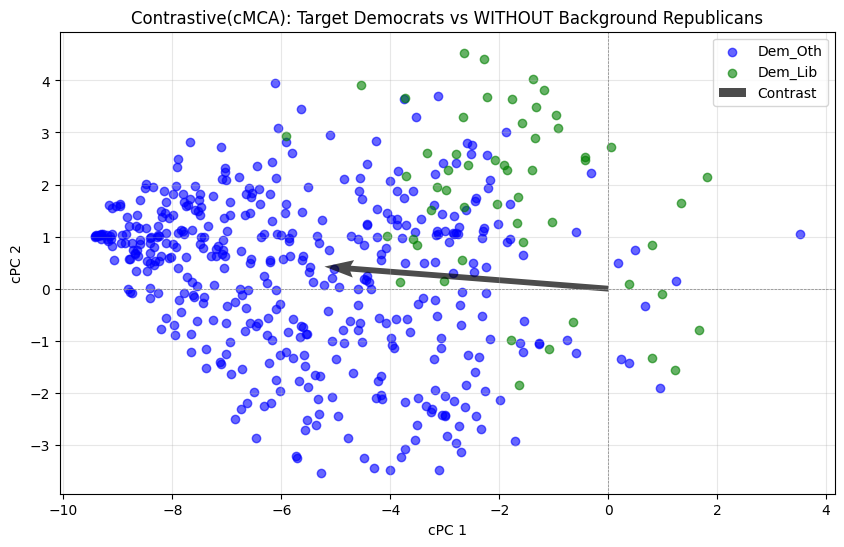

In [ ]:
# (c)Target:Dem,Background:Rep (withoutBackground)
# Visualization with color coding by DemTag
plt.figure(figsize=(10, 6))

# Scatter plot for Republicans
# plt.scatter(group1_pca[:, 0], group1_pca[:, 1], alpha=0.6, label="Republican", color="red")

# Scatter plot for Democrats, colored by DemTag
for tag in DemClass['DemTag'].unique():
    subset = DemClass[DemClass['DemTag'] == tag]
    subset_pca = pca.transform(subset.drop(columns=['DemTag'])) # Apply the same PCA transformation
    color = "green" if tag == "Dem_Lib" else "blue"  # Assign green and blue colors based on DemTag
    plt.scatter(subset_pca[:, 0], subset_pca[:, 1], alpha=0.6, label=tag, color=color)

plt.quiver(
    np.mean(group1_pca[:, 0]),
    np.mean(group1_pca[:, 1]),
    np.mean(contrast[:, 0]),
    np.mean(contrast[:, 1]),
    angles='xy', scale_units='xy', scale=1, color='black', alpha=0.7, label='Contrast'
)

plt.title("Contrastive(cMCA): Target Democrats vs WITHOUT Background Republicans")
plt.xlabel("cPC 1")
plt.ylabel("cPC 2")
plt.axhline(0, color='grey', linewidth=0.5, linestyle='--')
plt.axvline(0, color='grey', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## (d)Target:Rep,Background:Dem (OriginalcMCAResults)

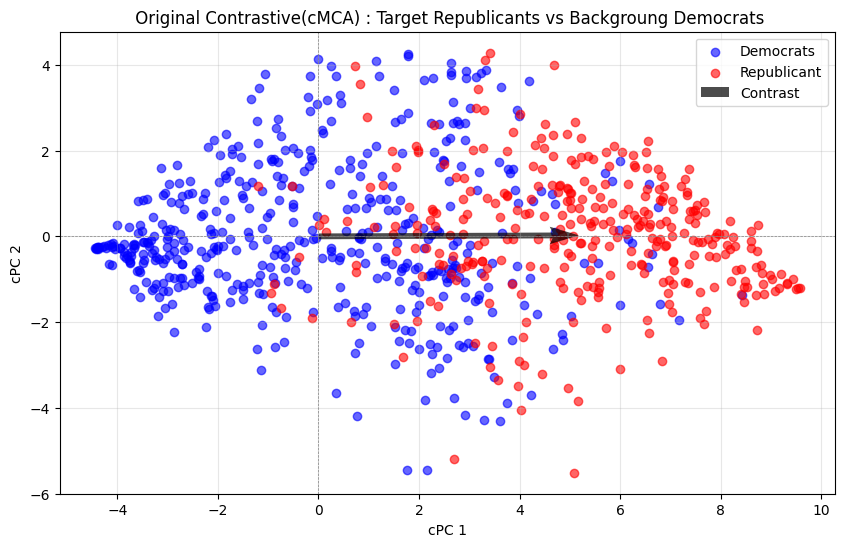

In [ ]:
# (d)Target:Rep,Background:Dem (OriginalcMCAResults)
# Background
group3 = data[data['partyid'] < 4].drop(columns=['partyid']) # Democrats

# Target
group4 = data[data['partyid'] > 4].drop(columns=['partyid']) # Republicans

# Apply PCA (proxy for MCA) directly to both groups without one-hot encoding
pca = PCA(n_components=2)

# Fit PCA on group 1 and transform both groups
group3_pca = pca.fit_transform(group3)
group4_pca = pca.transform(group4)

# Compute the contrast (difference in coordinates)
contrast = group4_pca - np.mean(group3_pca, axis=0)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(group3_pca[:, 0], group3_pca[:, 1], alpha=0.6, label="Democrats", color="blue")
plt.scatter(group4_pca[:, 0], group4_pca[:, 1], alpha=0.6, label="Republicant", color="red")
plt.quiver(
    np.mean(group1_pca[:, 0]),  # X-coordinate of the arrow starting point
    np.mean(group1_pca[:, 1]),  # Y-coordinate of the arrow starting point
    np.mean(contrast[:, 0]),  # X-component of the arrow vector (mean contrast for dimension 1)
    np.mean(contrast[:, 1]),  # Y-component of the arrow vector (mean contrast for dimension 2)
    angles='xy', scale_units='xy', scale=1, color='black', alpha=0.7, label='Contrast'
)
plt.title(" Original Contrastive(cMCA) : Target Republicants vs Backgroung Democrats")
plt.xlabel("cPC 1")
plt.ylabel("cPC 2")
plt.axhline(0, color='grey', linewidth=0.5, linestyle='--')
plt.axvline(0, color='grey', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## (e)Target:Rep,Background:Dem (withBackground)

 According to the category coordinates and factor loadings, the variables
 that divide Republicans are not the same as those that divide Democrats. Instead, we and that the fundamental variables, social ideology, economic ideology, and national security ideology, are the most inuential.


 social ideology, economic ideology, and national
 security ideology

socialideology
Cramér's V correlation between partyid and varaible : 0.44610105241754777


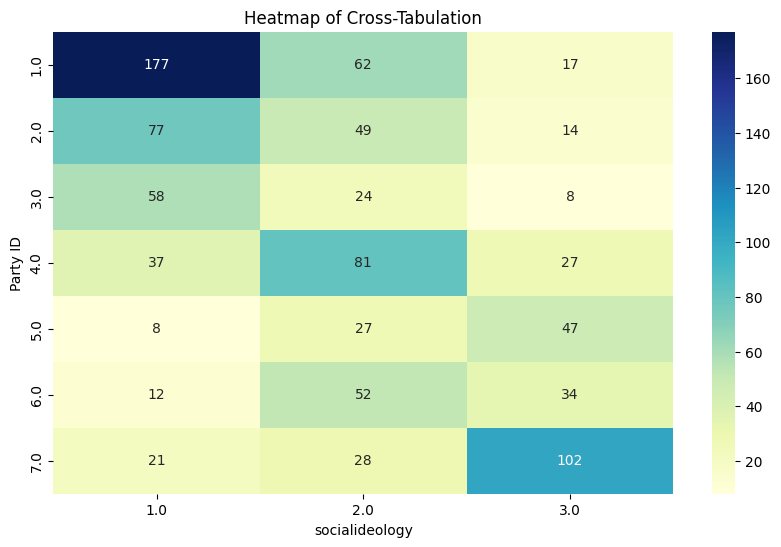

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'socialideology'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

economicideology
Cramér's V correlation between partyid and varaible : 0.5755777299628754


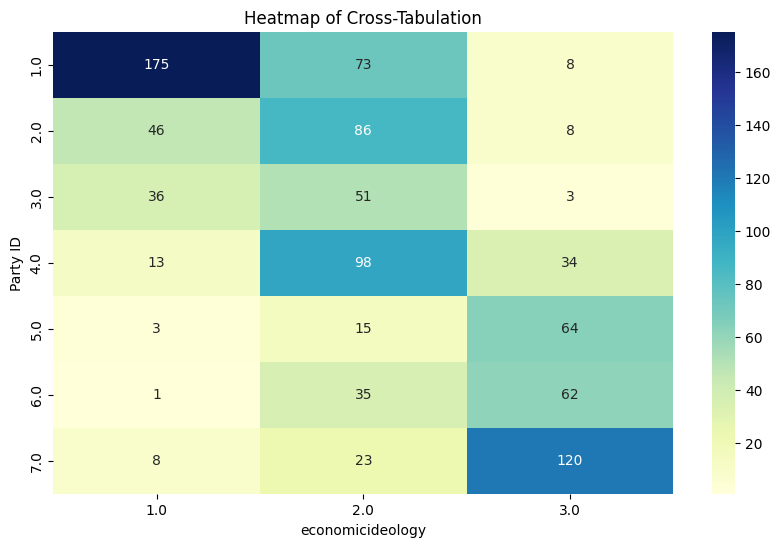

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'economicideology'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

natsecurityideology
Cramér's V correlation between partyid and varaible : 0.4864972070166098


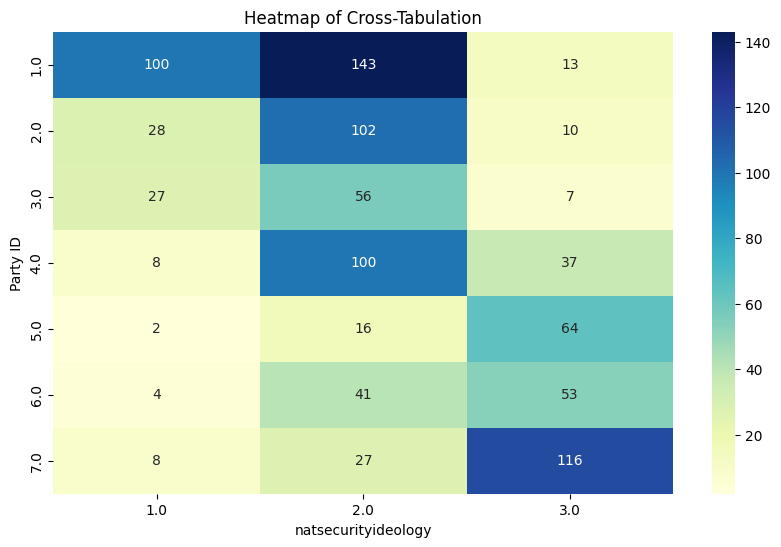

In [ ]:
# Check with Tagget varaibles PartyId Correlation

VaribletoCkecked = 'natsecurityideology'

if 'partyid' in data.columns and VaribletoCkecked in data.columns:
    correlation = cramers_v(data['partyid'], data[VaribletoCkecked])
    print(VaribletoCkecked)
    print(f"Cramér's V correlation between partyid and varaible : {correlation}")
else:
    print("One or both of the specified columns are not present in the DataFrame.")

 # Create the cross-tabulation
cross_tab = pd.crosstab(data['partyid'], data[VaribletoCkecked])

# Display the cross-tabulation

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cross-Tabulation")
plt.xlabel(VaribletoCkecked)
plt.ylabel("Party ID")
plt.show()

In [ ]:
# Create RepClass DataFrame by copying group2
RepClass = group4.copy()
# Now you can proceed with the rest of your code
RepClass['RepTag'] = ''

# Iterate through the DataFrame and update the 'RepTag' column based on your conditions
for index, row in group4.iterrows():
    if row['socialideology'] <= 2 and row['economicideology'] <= 2 and row['natsecurityideology'] <= 2:
        RepClass.loc[index, 'RepTag'] = 'Rep_Con'
    else:
        RepClass.loc[index, 'RepTag'] = 'Rep_Oth'
    # Add other conditions for different DemTag values if needed

In [ ]:
RepClass['RepTag'].value_counts()

,count
RepTag,
Rep_Oth,284
Rep_Con,47


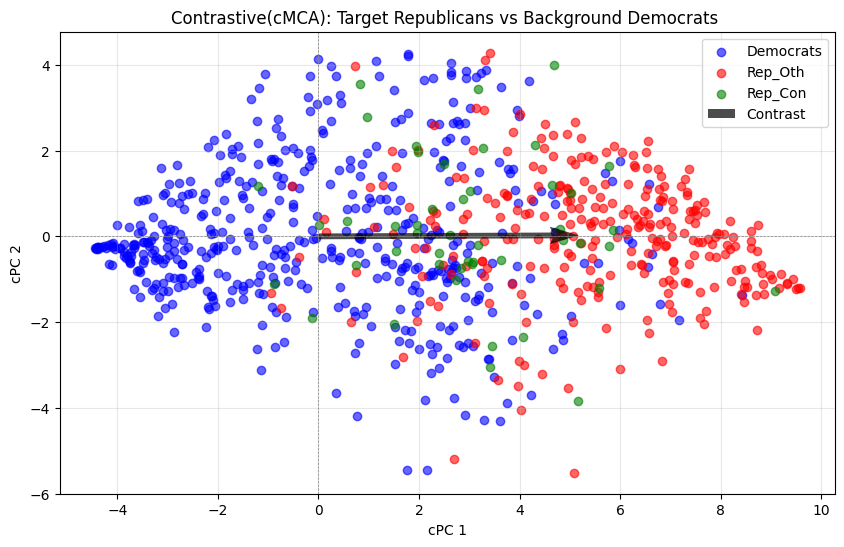

In [ ]:
# (e)Target:Rep,Background:Dem (withBackground)
# Visualization with color coding by DemTag
plt.figure(figsize=(10, 6))

# Scatter plot for Republicans
plt.scatter(group3_pca[:, 0], group3_pca[:, 1], alpha=0.6, label="Democrats", color="blue")

# Scatter plot for Democrats, colored by DemTag
for tag in RepClass['RepTag'].unique():
    subset = RepClass[RepClass['RepTag'] == tag]
    subset_pca = pca.transform(subset.drop(columns=['RepTag'])) # Apply the same PCA transformation
    color = "green" if tag == "Rep_Con" else "red"  # Assign green and blue colors based on DemTag
    plt.scatter(subset_pca[:, 0], subset_pca[:, 1], alpha=0.6, label=tag, color=color)

plt.quiver(
    np.mean(group3_pca[:, 0]),
    np.mean(group3_pca[:, 1]),
    np.mean(contrast[:, 0]),
    np.mean(contrast[:, 1]),
    angles='xy', scale_units='xy', scale=1, color='black', alpha=0.7, label='Contrast'
)

plt.title("Contrastive(cMCA): Target Republicans vs Background Democrats ")
plt.xlabel("cPC 1")
plt.ylabel("cPC 2")
plt.axhline(0, color='grey', linewidth=0.5, linestyle='--')
plt.axvline(0, color='grey', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## (f)Target:Rep,Background:Dem (withoutBackground)

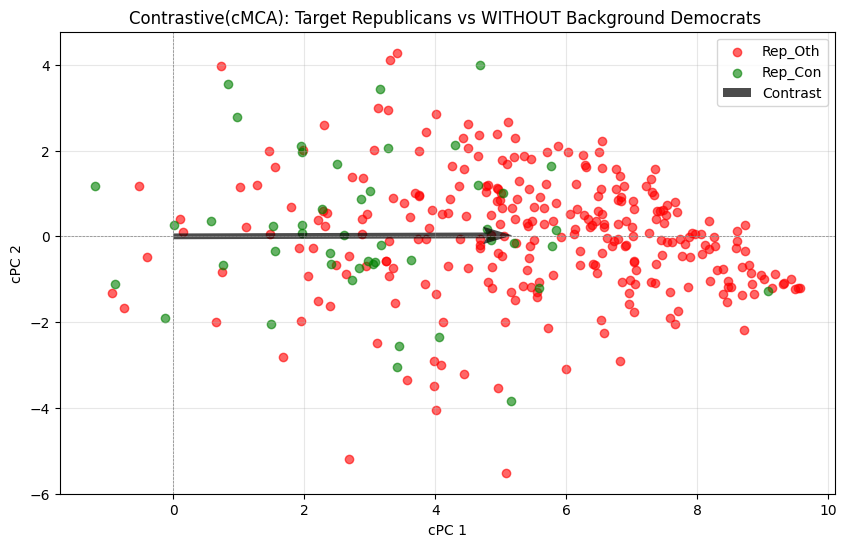

In [ ]:
# (f)Target:Rep,Background:Dem (withoutBackground)
# Visualization with color coding by DemTag
plt.figure(figsize=(10, 6))

# Scatter plot for Republicans
# plt.scatter(group3_pca[:, 0], group3_pca[:, 1], alpha=0.6, label="Democrats", color="blue")

# Scatter plot for Democrats, colored by DemTag
for tag in RepClass['RepTag'].unique():
    subset = RepClass[RepClass['RepTag'] == tag]
    subset_pca = pca.transform(subset.drop(columns=['RepTag'])) # Apply the same PCA transformation
    color = "green" if tag == "Rep_Con" else "red"  # Assign green and blue colors based on DemTag
    plt.scatter(subset_pca[:, 0], subset_pca[:, 1], alpha=0.6, label=tag, color=color)

plt.quiver(
    np.mean(group3_pca[:, 0]),
    np.mean(group3_pca[:, 1]),
    np.mean(contrast[:, 0]),
    np.mean(contrast[:, 1]),
    angles='xy', scale_units='xy', scale=1, color='black', alpha=0.7, label='Contrast'
)

plt.title("Contrastive(cMCA): Target Republicans vs WITHOUT Background Democrats ")
plt.xlabel("cPC 1")
plt.ylabel("cPC 2")
plt.axhline(0, color='grey', linewidth=0.5, linestyle='--')
plt.axvline(0, color='grey', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()